In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [5]:
#Import AAPL and QQQ data
df_AAPL = pd.read_csv('AAPL_full_dataset.csv')
df_QQQ = pd.read_csv('QQQ_full_dataset.csv')
df_AAPL['rec_date'] = pd.to_datetime(df_AAPL['rec_date'])
df_QQQ['rec_date'] = pd.to_datetime(df_QQQ['rec_date'])

In [6]:
df_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   rec_date                   3651 non-null   datetime64[ns]
 1   open                       3651 non-null   float64       
 2   high                       3651 non-null   float64       
 3   low                        3651 non-null   float64       
 4   close                      3651 non-null   float64       
 5   volume                     3651 non-null   float64       
 6   weekday                    3651 non-null   int64         
 7   month                      3651 non-null   int64         
 8   holiday                    3651 non-null   int64         
 9   close_change               3651 non-null   float64       
 10  volume_change              3651 non-null   float64       
 11  price_gap                  3651 non-null   float64       
 12  is_clo

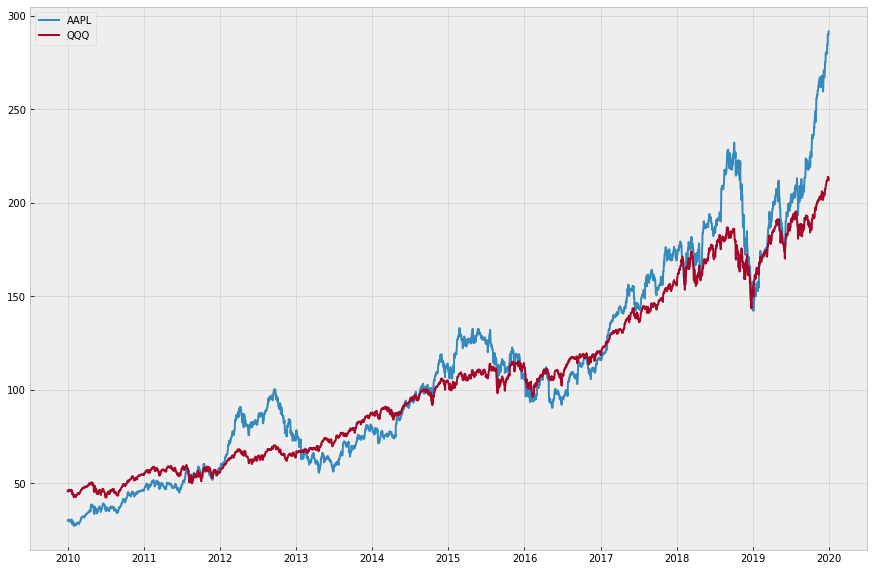

In [90]:
# Plot historical stock prices for reference
plt.figure(figsize=(15, 10))
plt.plot(df_AAPL['rec_date'],df_AAPL['close'])
plt.plot(df_QQQ['rec_date'],df_QQQ['close'])
plt.legend(['AAPL', 'QQQ'], loc='upper left')
plt.show()

We can see that, QQQ, as the technology index ETF, has lower volatility compared to AAPL, one of QQQ's constituents. However, in general, they move quite similarly due to their similar nature.

During our analysis, we also find that public holidays affects model performance. To simulate market situation in reality, we have to take into account public holidays. Counts of public holiday are summarized below:

In [69]:
df_AAPL[['rec_date','holiday']].groupby([df_AAPL.rec_date.dt.year]).agg(['sum','count'])

holiday      
             sum count
rec_date              
2010          12   365
2011          11   365
2012          12   366
2013          10   365
2014          10   365
2015          11   365
2016          11   366
2017          12   365
2018          11   365
2019          10   364

As observed, there are around 10-12 holidays each year, excluding weekends.

In [80]:
# Analysis of price gaps
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#gaps_AAPL = df_AAPL[['month','rec_date','close_change','volume_change','price_gap']].groupby([df_AAPL.rec_date.dt.year,'month']).mean()

Analysis by months

In [70]:
#AAPL
gaps_AAPL_month = df_AAPL[['month','rec_date','close_change','volume_change','price_gap']].groupby(['month'])

Analysing month:  1


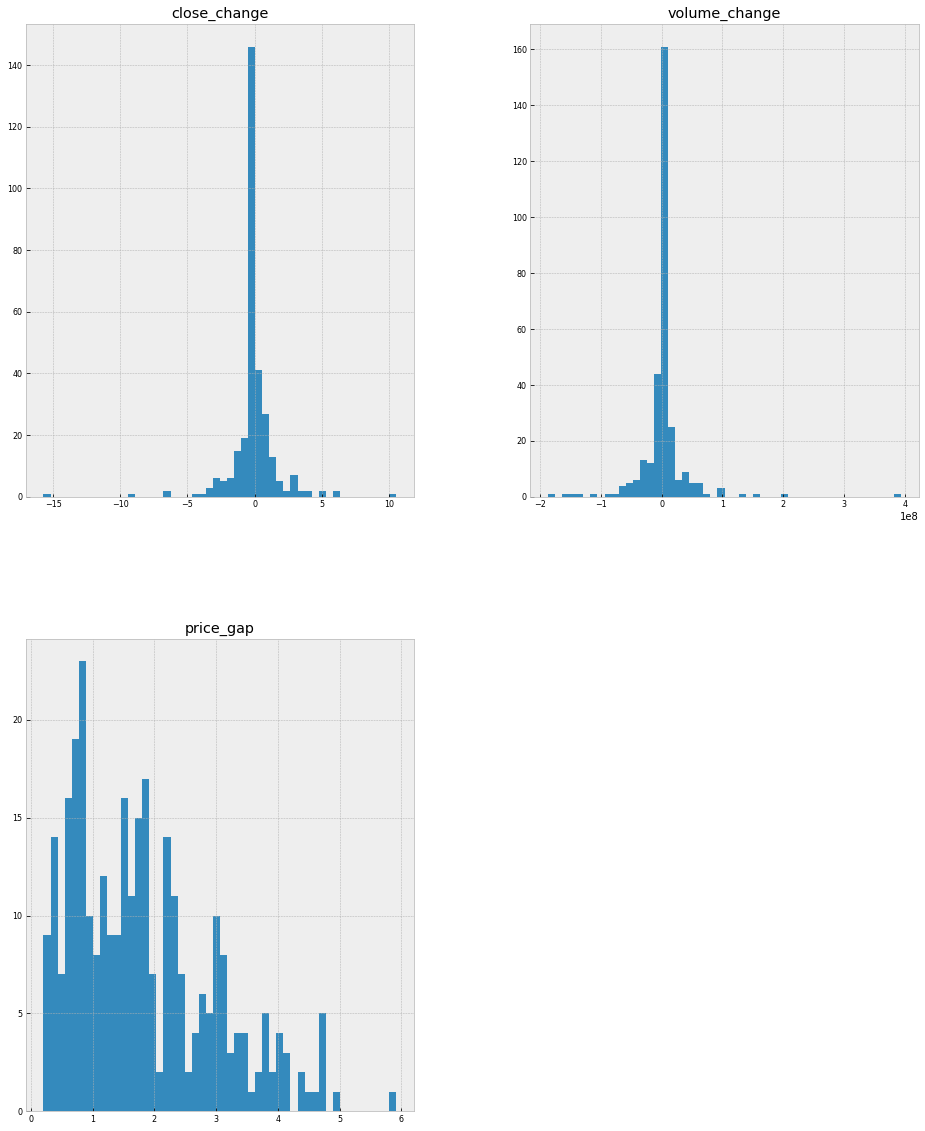

Analysing month:  2


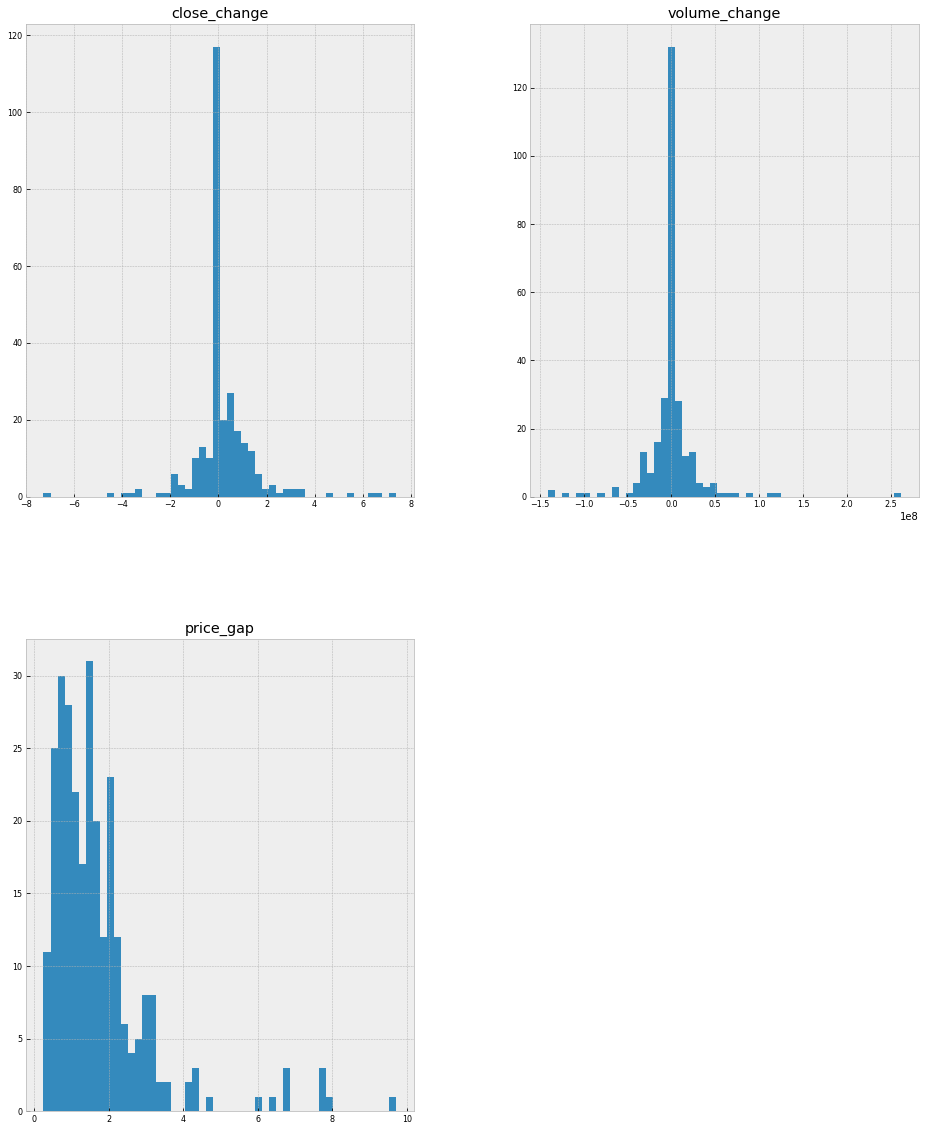

Analysing month:  3


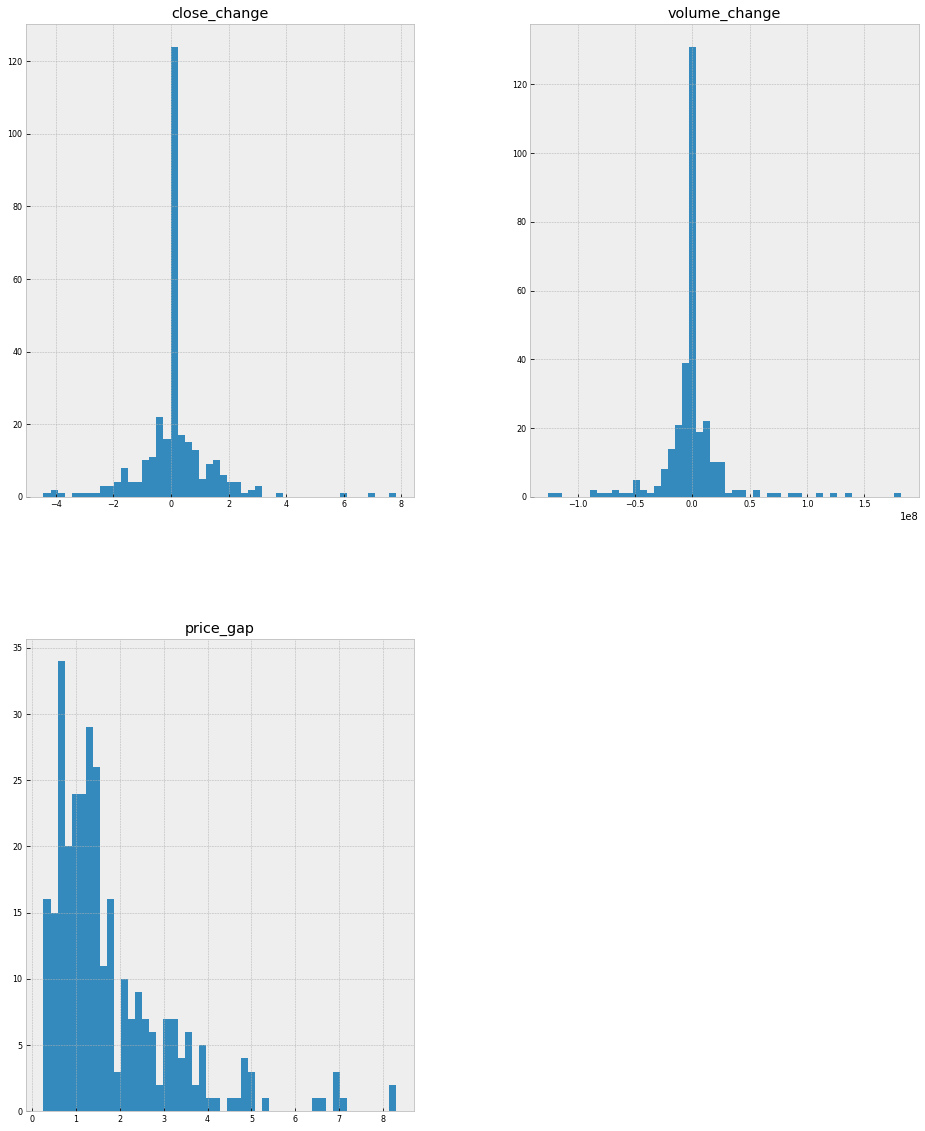

Analysing month:  4


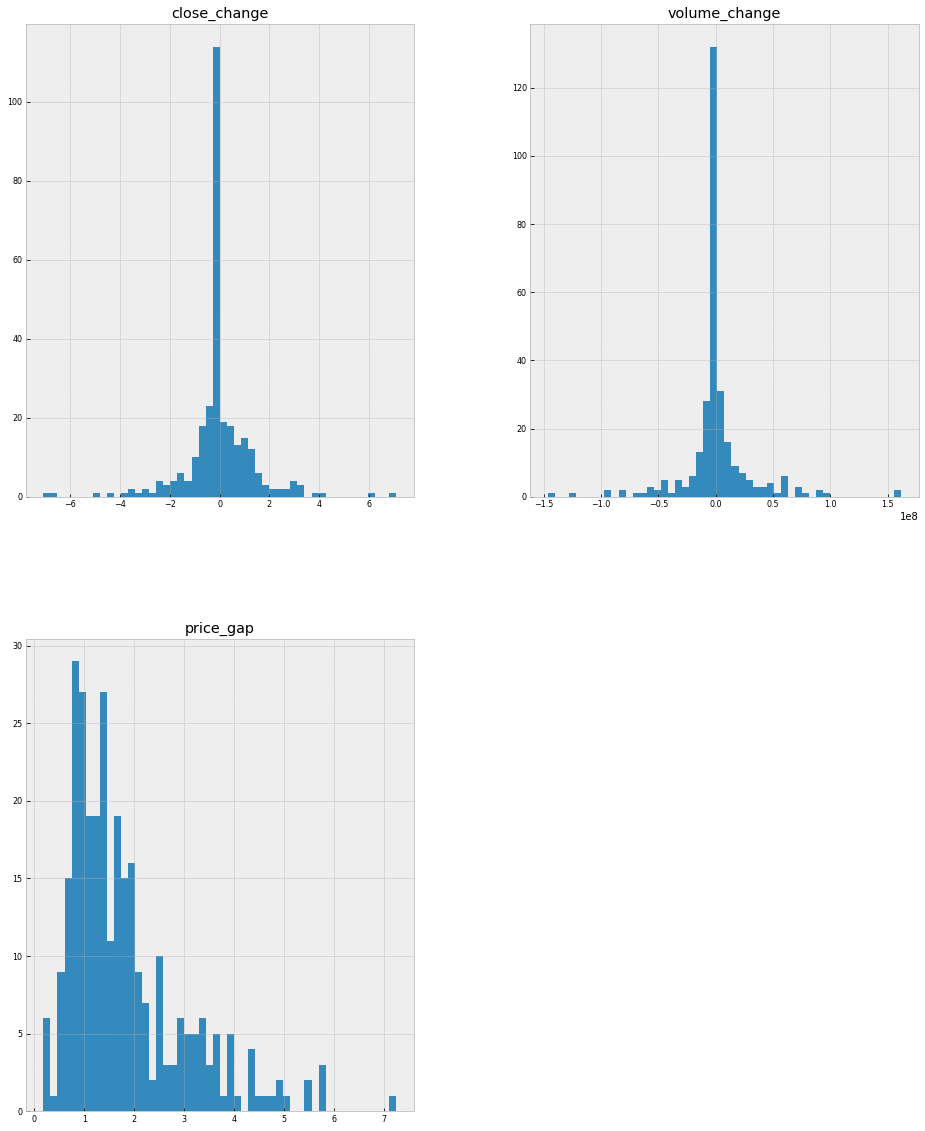

Analysing month:  5


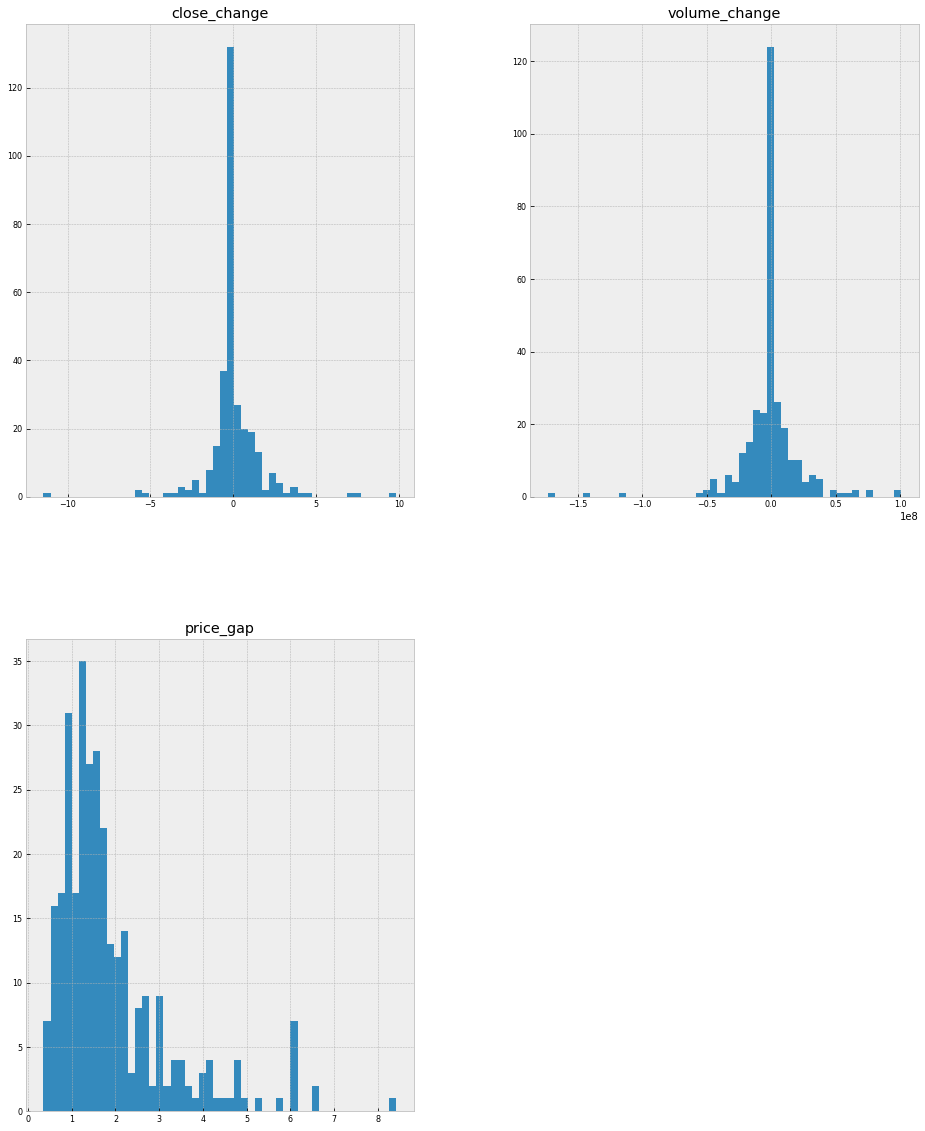

Analysing month:  6


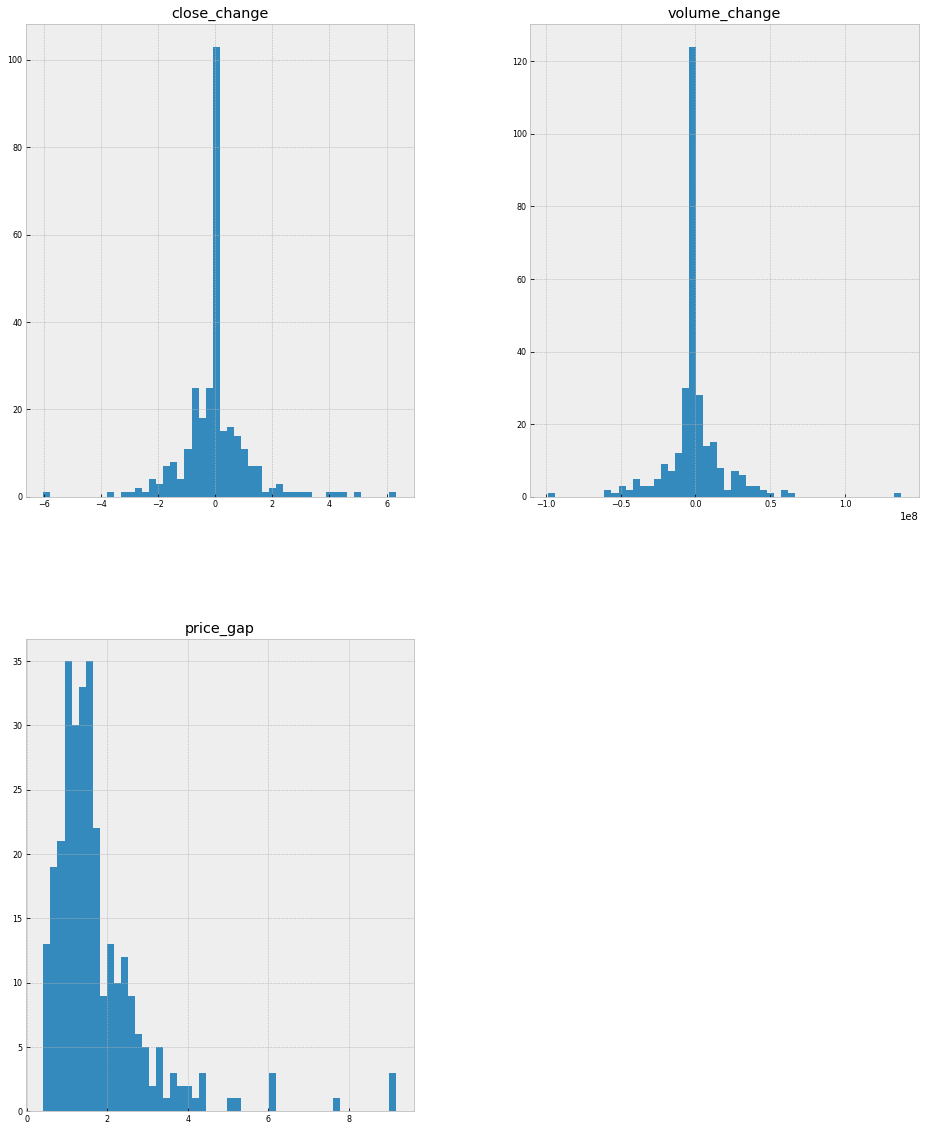

Analysing month:  7


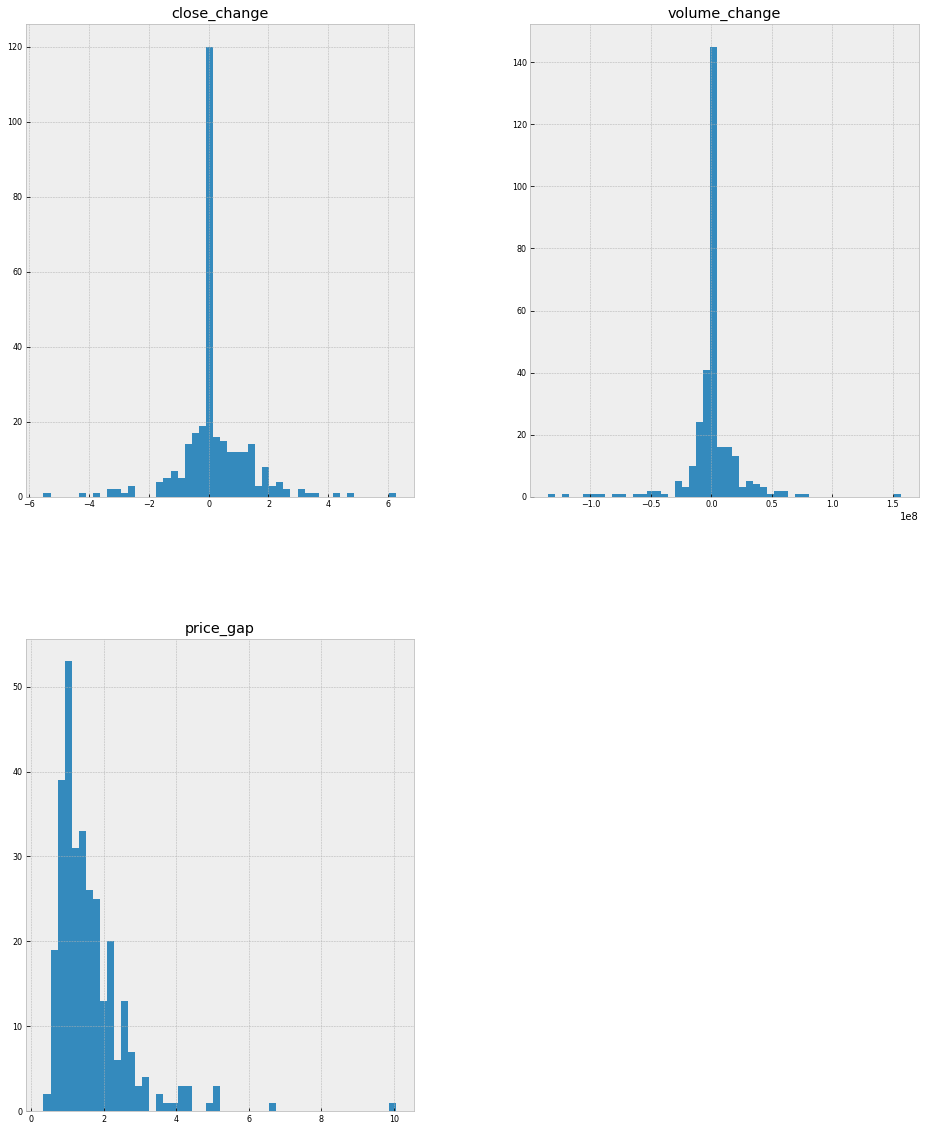

Analysing month:  8


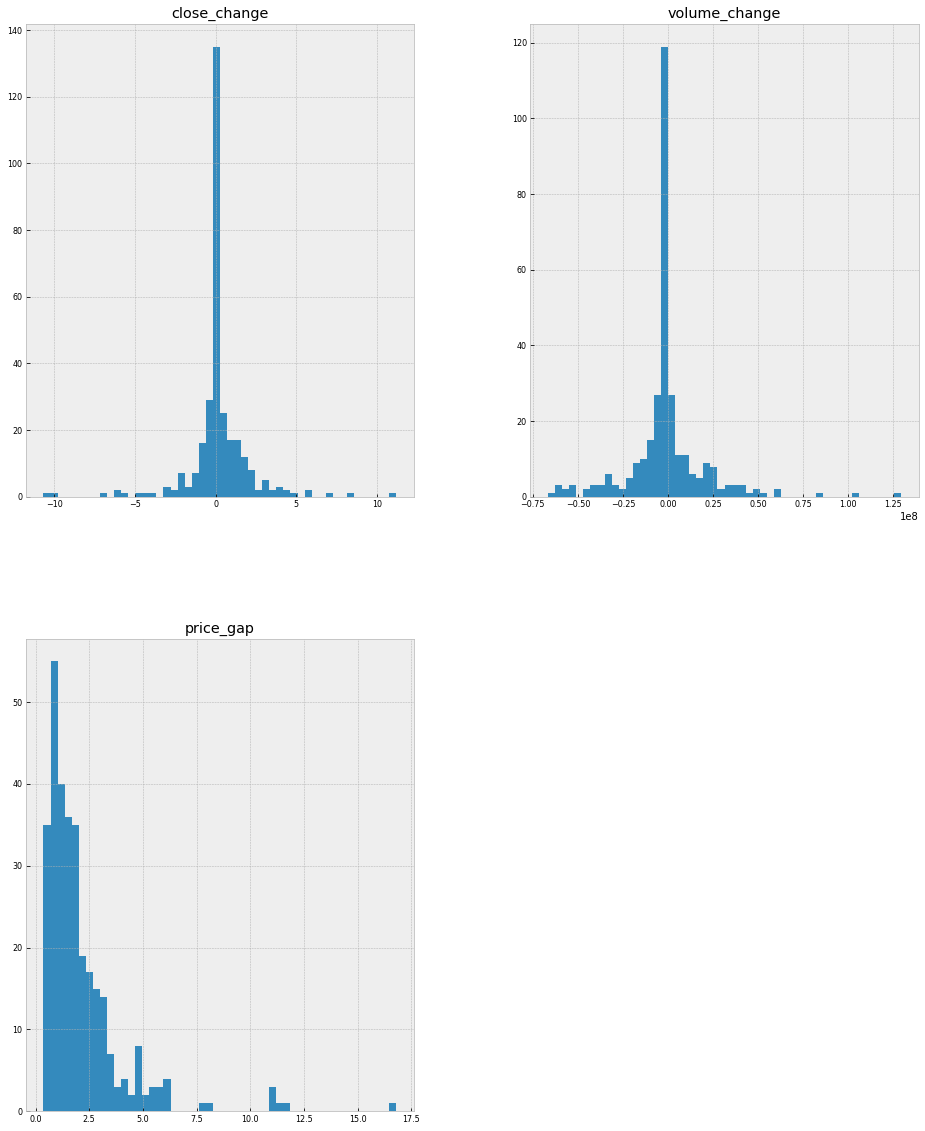

Analysing month:  9


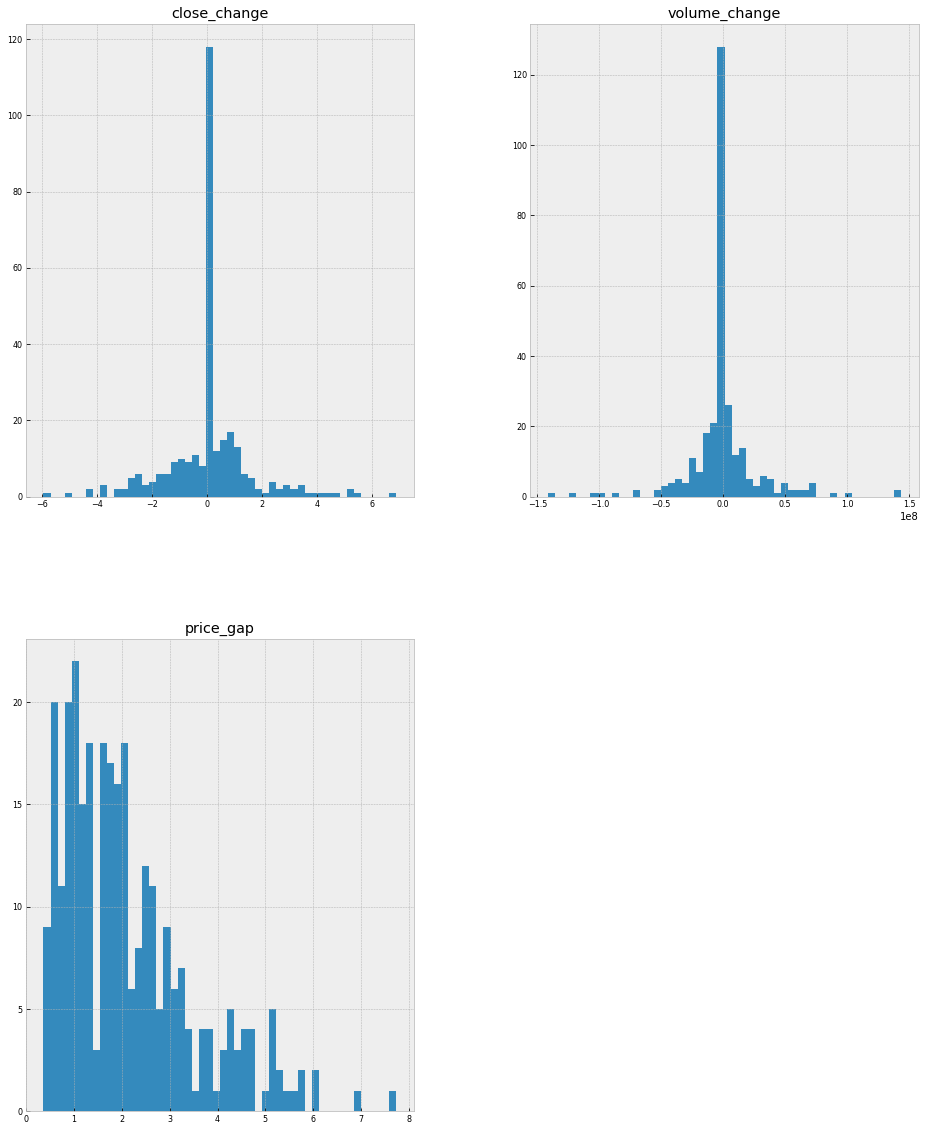

Analysing month:  10


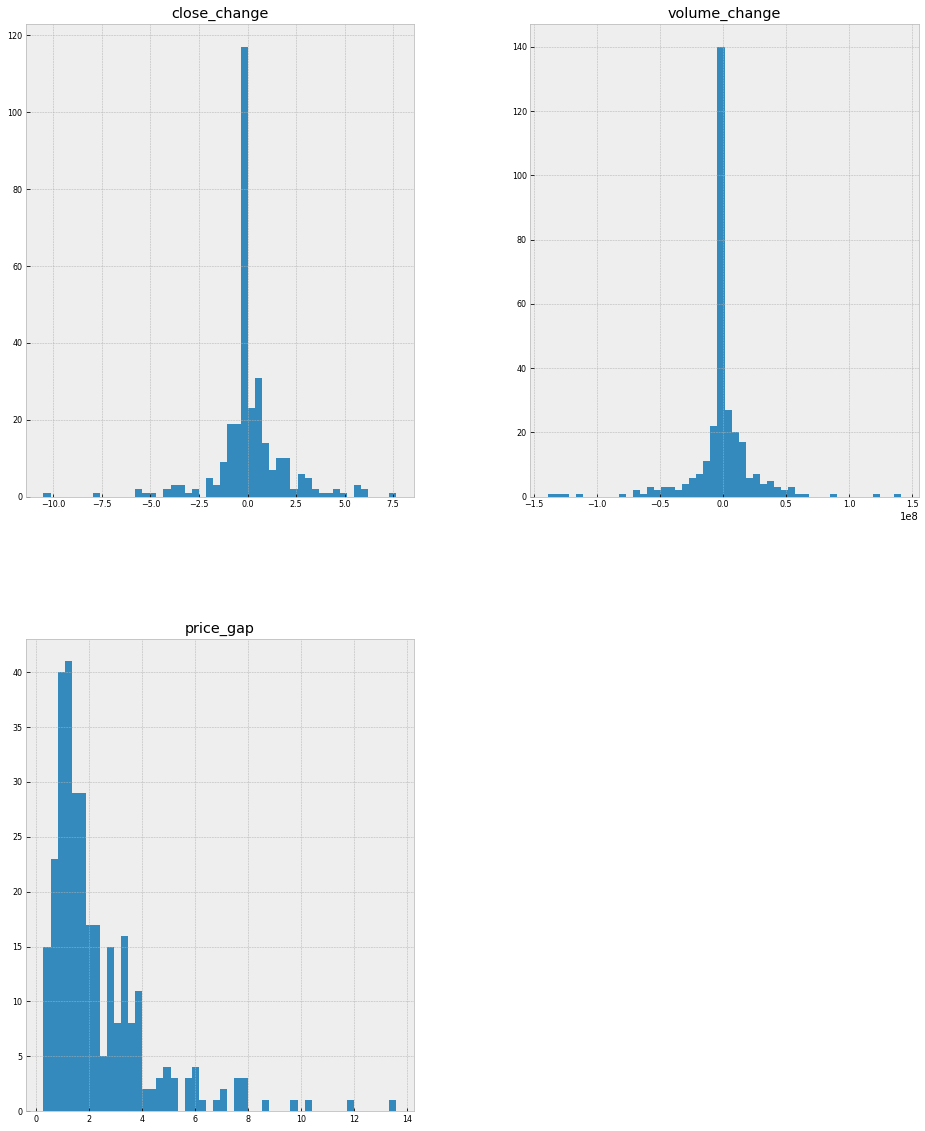

Analysing month:  11


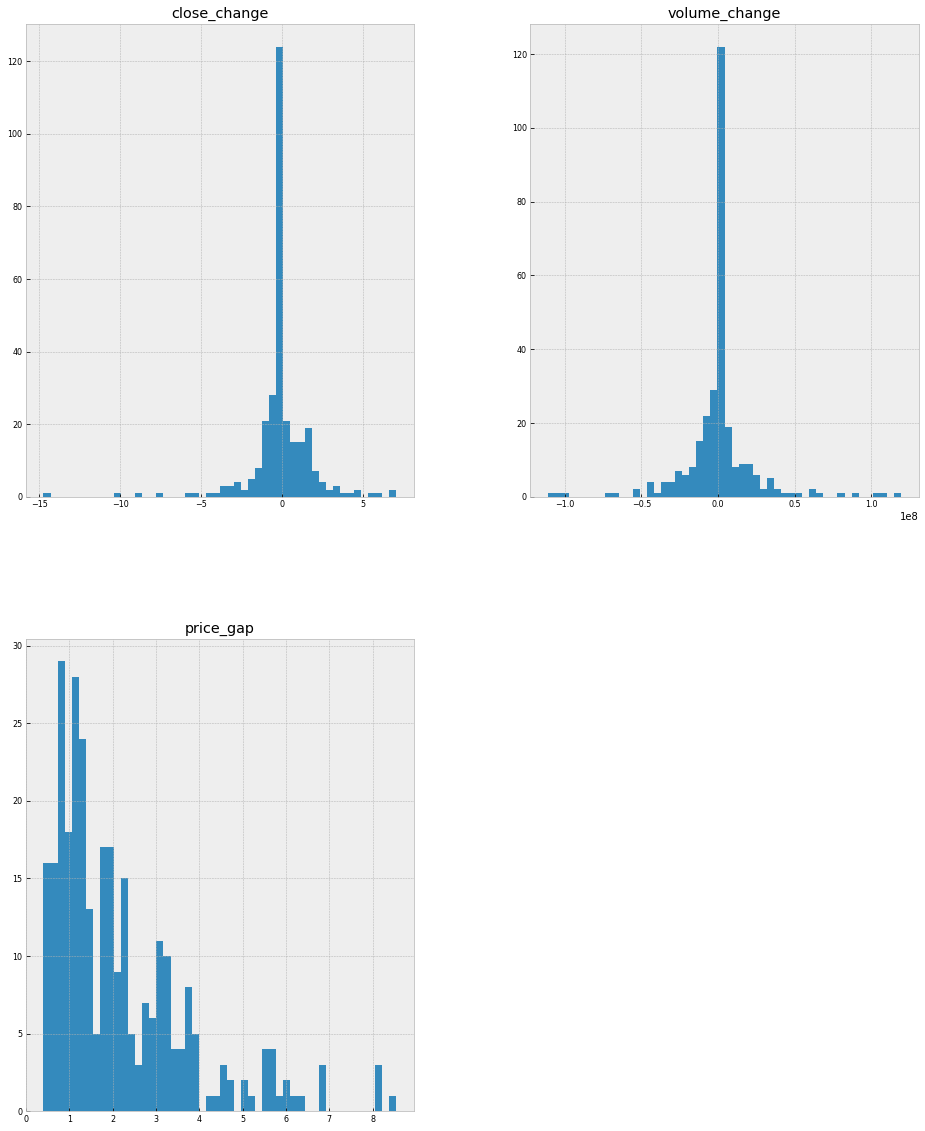

Analysing month:  12


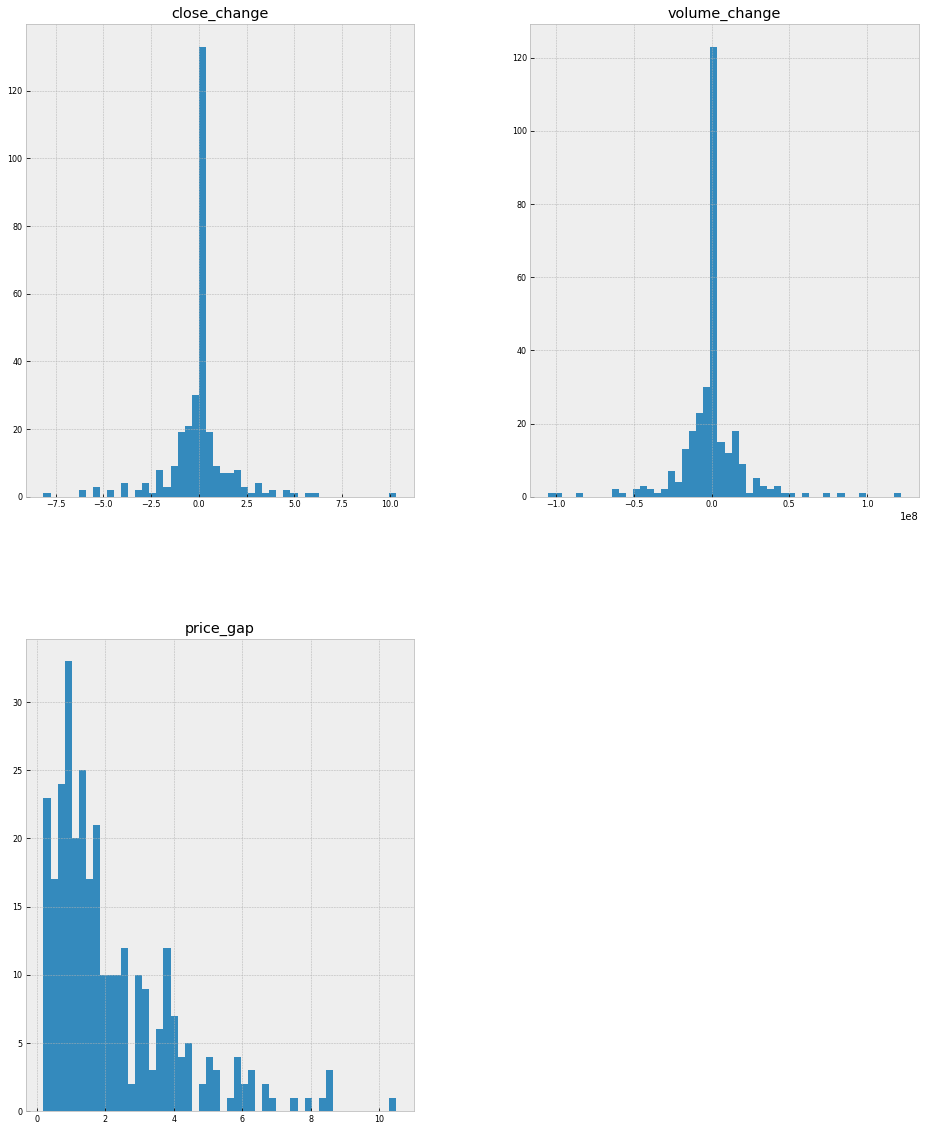

In [51]:
for month, data in gaps_AAPL_month:
    print('Analysing month: ', month)
    data.drop(columns=['month']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()

In [41]:
gaps_AAPL_month.mean()

,close_change,volume_change,price_gap
month,,,
1,-0.003917,1.272227e+06,1.806802
2,0.217725,-5.119365e+05,1.719068
3,0.112604,-5.308368e+05,1.784604
4,0.010109,1.336411e+06,1.800514
5,0.069903,-7.155539e+05,1.889857
6,-0.011548,-3.944777e+05,1.766652
7,0.169774,1.013226e+03,1.632908
8,0.188613,-3.620281e+05,2.131281
9,0.034252,4.238150e+05,2.110262


In [55]:
gaps_AAPL_month.var()

,close_change,volume_change,price_gap
month,,,
1,3.381930,1.640749e+15,1.308030
2,1.854516,9.541353e+14,1.928182
3,1.685888,7.655886e+14,1.957104
4,2.016866,9.017262e+14,1.379500
5,2.614601,5.938378e+14,1.688878
6,1.399195,3.972080e+14,1.592802
7,1.426986,5.867134e+14,1.049255
8,3.757100,4.627459e+14,3.919620
9,2.510417,8.446403e+14,1.862498


In [82]:
gaps_AAPL_month.describe()

close_change                                                          \
             count      mean       std        min       25%  50%       75%   
month                                                                        
1            310.0 -0.003917  1.839002 -15.729996 -0.202855  0.0  0.398217   
2            282.0  0.217725  1.361806  -7.279999 -0.023214  0.0  0.548216   
3            310.0  0.112604  1.298417  -4.430008 -0.225000  0.0  0.452862   
4            300.0  0.010109  1.420164  -7.080002 -0.355715  0.0  0.377502   
5            310.0  0.069903  1.616973 -11.459991 -0.357500  0.0  0.357141   
6            300.0 -0.011548  1.182876  -6.010010 -0.471786  0.0  0.354996   
7            310.0  0.169774  1.194565  -5.529999 -0.128212  0.0  0.610001   
8            310.0  0.188613  1.938324 -10.680008 -0.157497  0.0  0.628572   
9            300.0  0.034252  1.584429  -5.959991 -0.486433  0.0  0.632504   
10           310.0  0.167396  1.824346 -10.509995 -0.289280  0.0  0.625357   
11           300.0 -0.035700  1.970934 -14.740005 -0.393571  0.0  0.490361   
12           309.0 -0.056547  1.704986  -8.130005 -0.432858  0.0  0.250000   

                 volume_change                                           \
             max         count          mean           std          min   
month                                                                     
1      10.570007         310.0  1.272227e+06  4.050615e+07 -186346300.0   
2       7.400002         282.0 -5.119365e+05  3.088908e+07 -140392000.0   
3       7.830002         310.0 -5.308368e+05  2.766927e+07 -125647200.0   
4       7.102859         300.0  1.336411e+06  3.002876e+07 -146203400.0   
5       9.850006         310.0 -7.155539e+05  2.436879e+07 -172928000.0   
6       6.339996         300.0 -3.944777e+05  1.993008e+07  -98473200.0   
7       6.279999         310.0  1.013226e+03  2.422217e+07 -135088100.0   
8      11.210007         310.0 -3.620281e+05  2.151153e+07  -66519600.0   
9       6.889999         300.0  4.238150e+05  2.906270e+07 -141349600.0   
10      7.660004         310.0 -3.462887e+05  2.682327e+07 -138697300.0   
11      7.060013         300.0 -1.095573e+05  2.386710e+07 -110894000.0   
12     10.339996         309.0 -2.372502e+05  2.138108e+07 -105128800.0   

                                              price_gap                      \
             25%  50%        75%          max     count      mean       std   
month                                                                         
1     -3754475.0  0.0  4663050.0  393039500.0     310.0  1.806802  1.143691   
2     -6218800.0  0.0  4120100.0  261430400.0     282.0  1.719068  1.388590   
3     -6068525.0  0.0  3431875.0  181997200.0     310.0  1.784604  1.398965   
4     -4567150.0  0.0  5252775.0  161346500.0     300.0  1.800514  1.174521   
5     -6978075.0  0.0  5030050.0  100689400.0     310.0  1.889857  1.299569   
6     -5214625.0  0.0  3413650.0  137099200.0     300.0  1.766652  1.262063   
7     -3789550.0  0.0  3594450.0  157011400.0     310.0  1.632908  1.024331   
8     -5587650.0  0.0  2749025.0  129376800.0     310.0  2.131281  1.979803   
9     -6237025.0  0.0  5074225.0  143489600.0     300.0  2.110262  1.364734   
10    -3906500.0  0.0  4847500.0  141144500.0     310.0  2.320581  1.917806   
11    -5661775.0  0.0  3767850.0  119245700.0     300.0  2.145281  1.586026   
12    -5717400.0  0.0  2915400.0  121892400.0     309.0  2.164665  1.790404   

                                                          
            min       25%       50%       75%        max  
month                                                     
1      0.205713  0.822860  1.625713  2.380005   5.919998  
2      0.242859  0.855001  1.432856  2.047499   9.720001  
3      0.262857  0.847145  1.331429  2.274998   8.300003  
4      0.180000  0.951791  1.419998  2.212500   7.239990  
5      0.351429  1.064644  1.515003  2.216425   8.428572  
6      0.417141  1.038574  1.460007  2.050003   9.1

In [42]:
# QQQ
gaps_QQQ_month = df_QQQ[['month','rec_date','close_change','volume_change','price_gap']].groupby(['month'])

Analysing month:  1


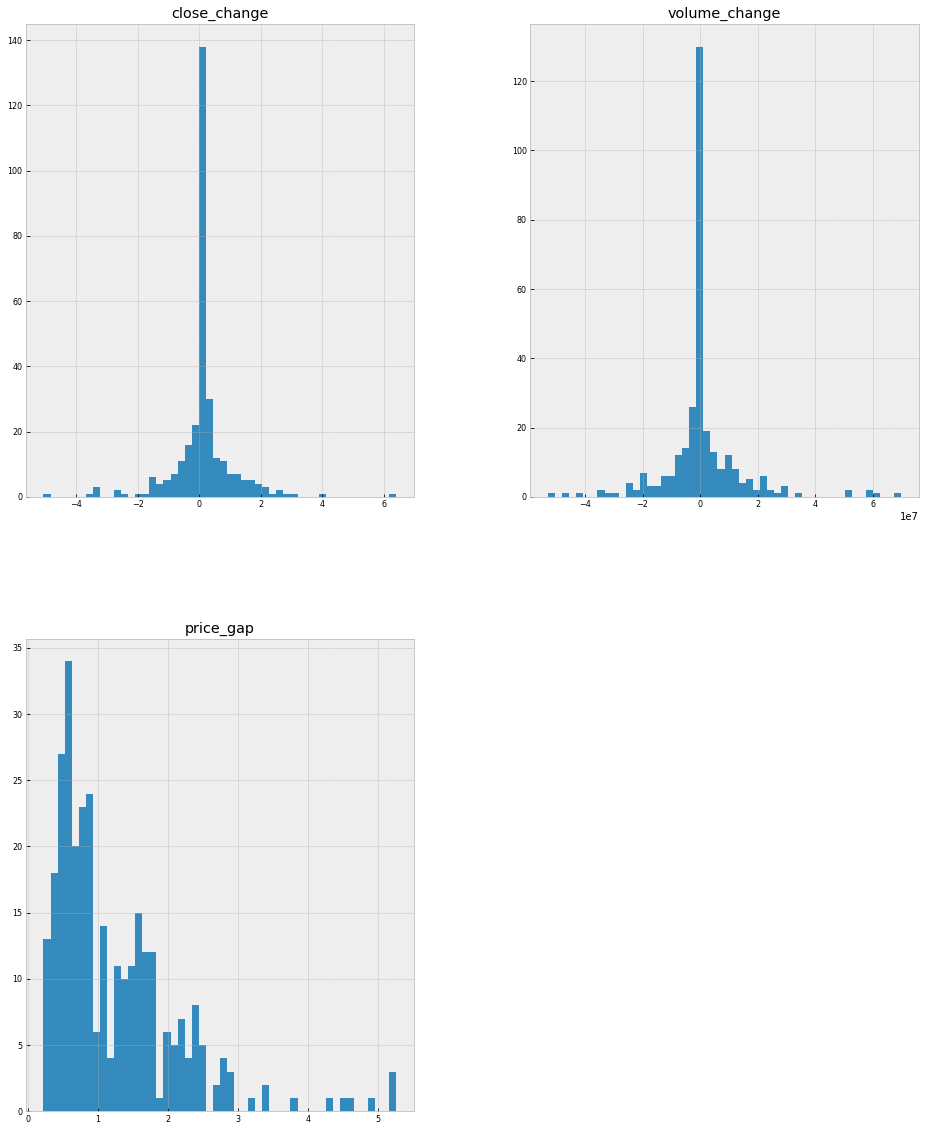

Analysing month:  2


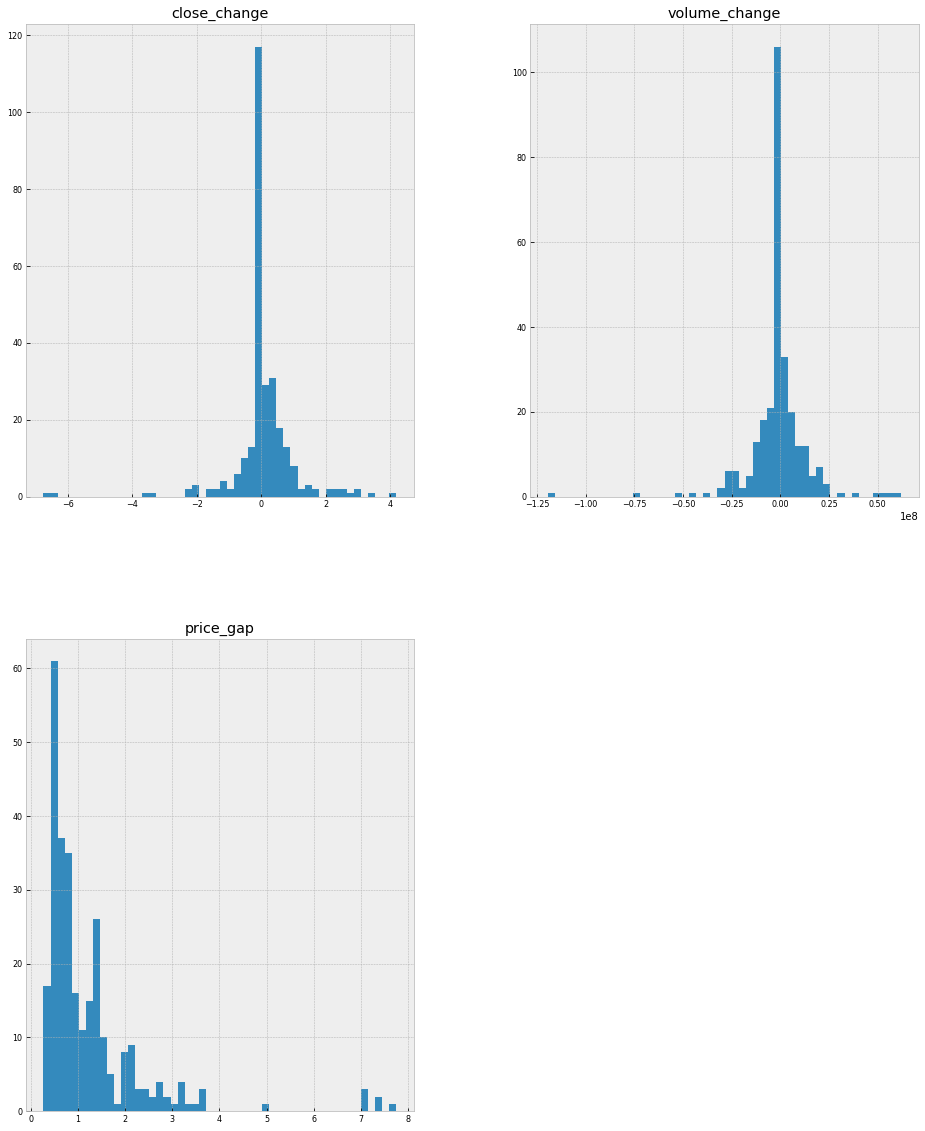

Analysing month:  3


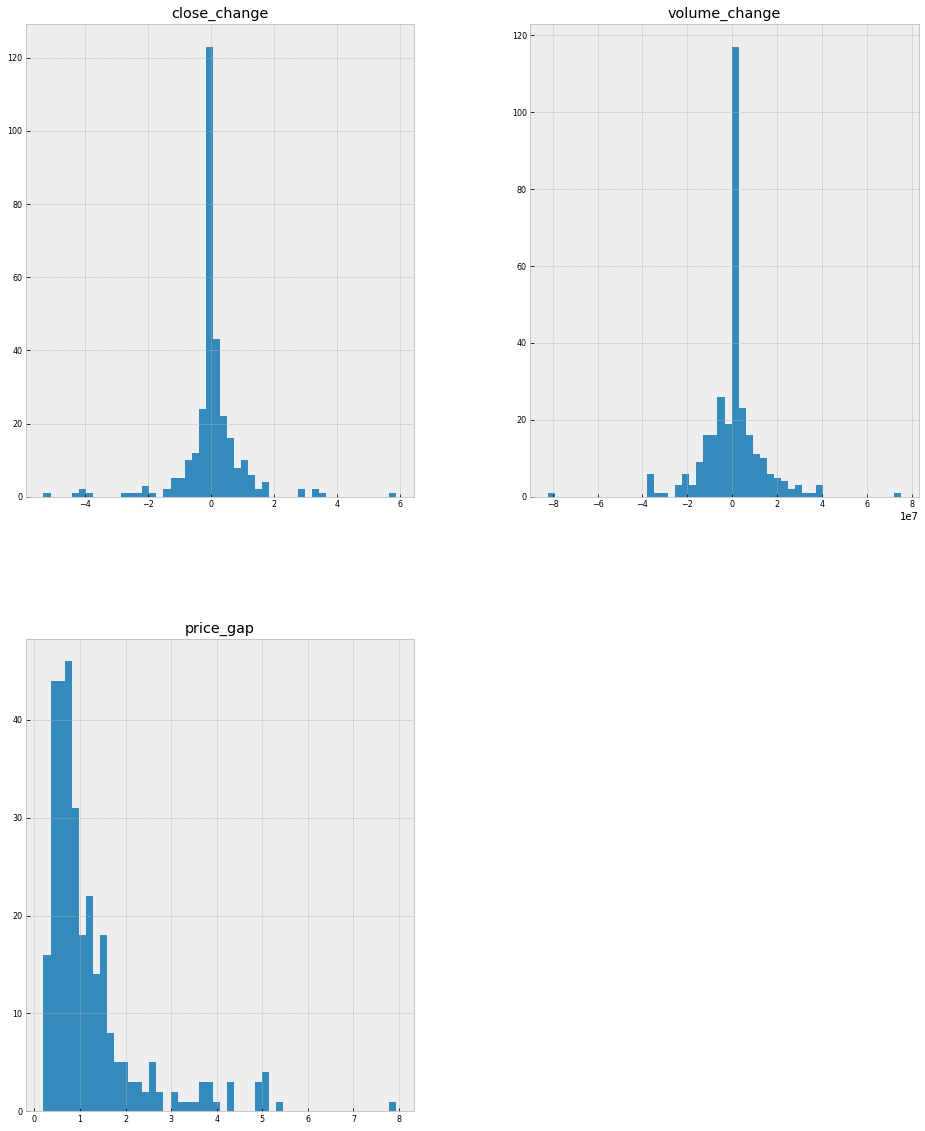

Analysing month:  4


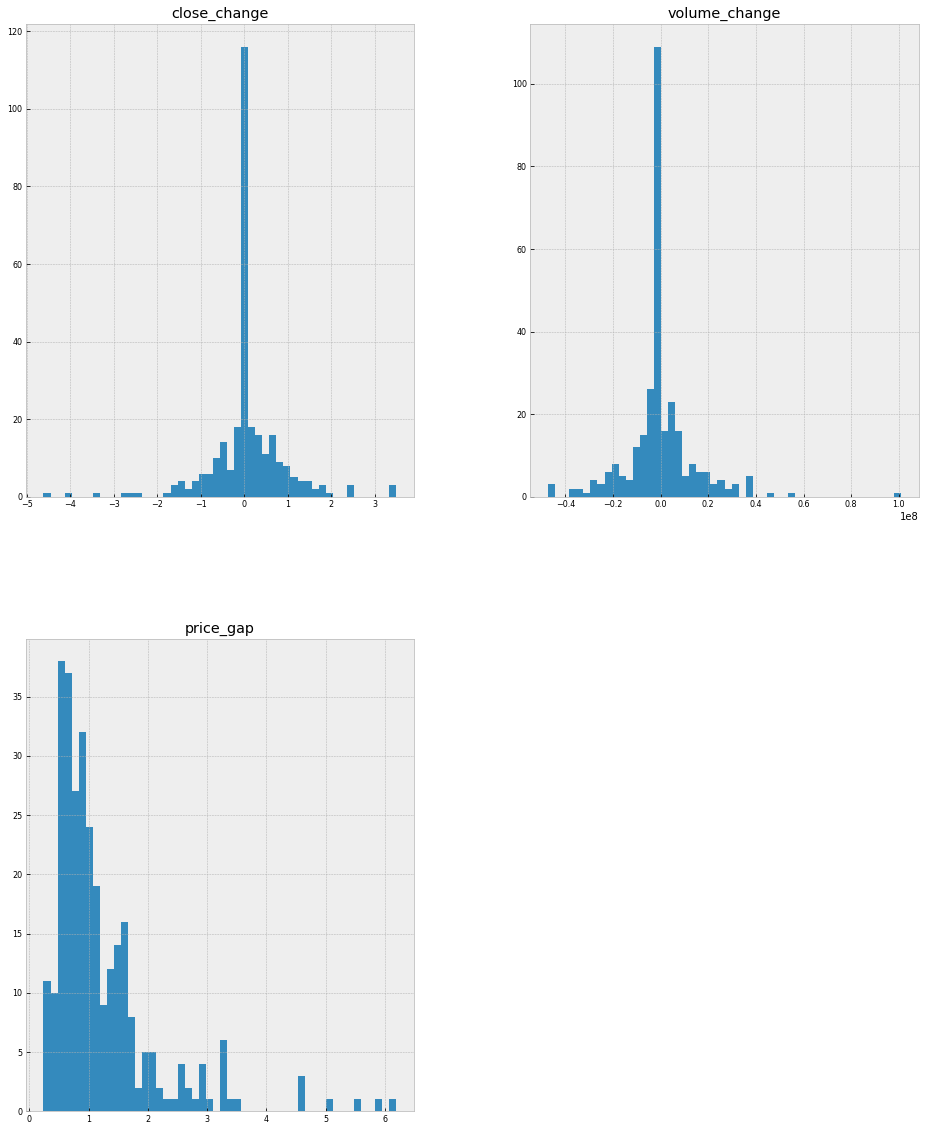

Analysing month:  5


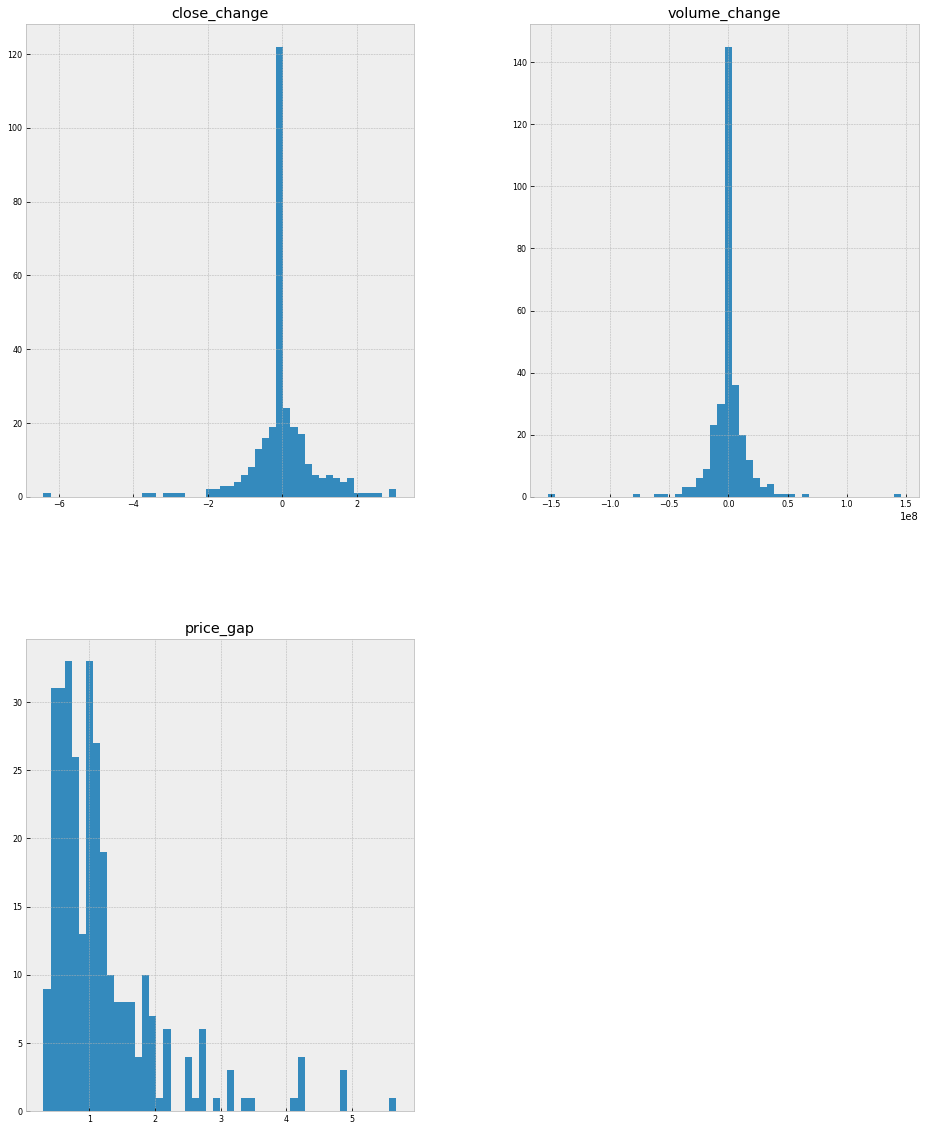

Analysing month:  6


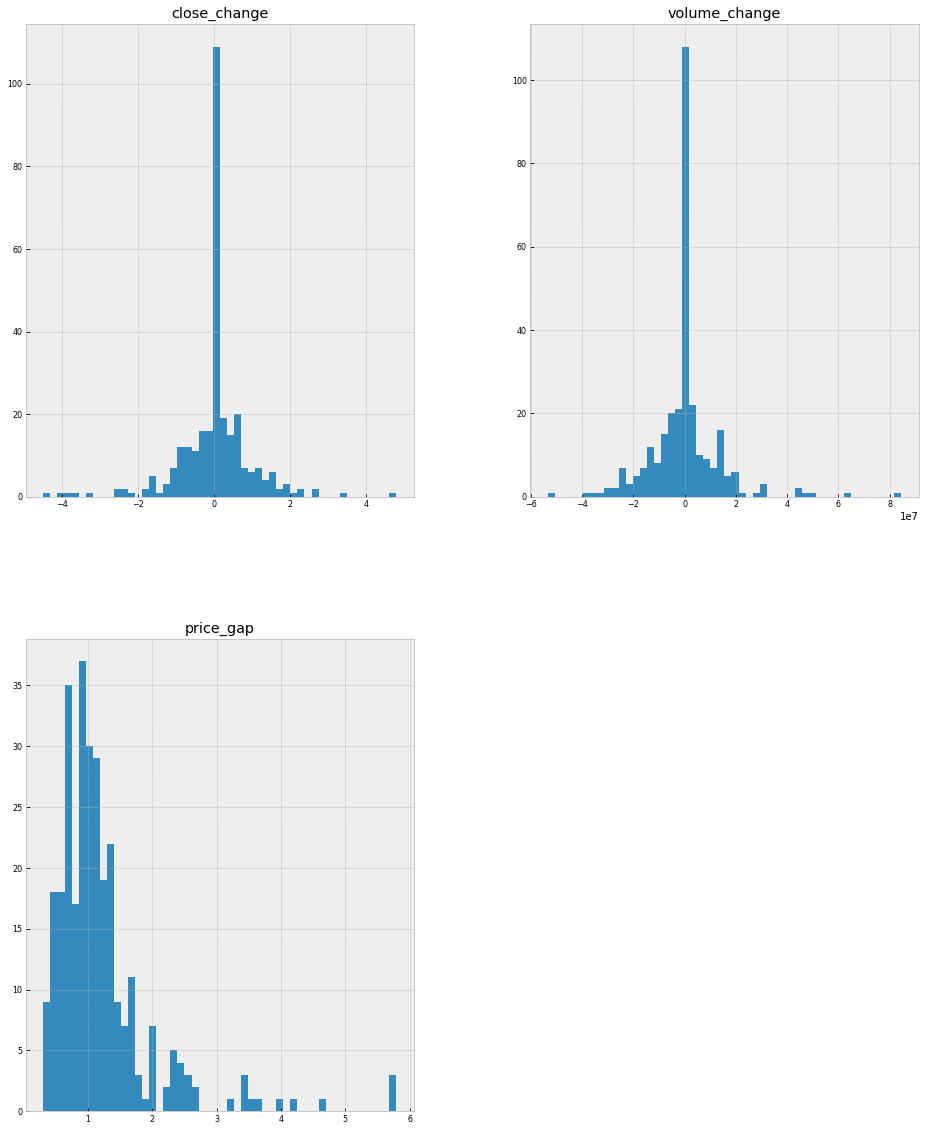

Analysing month:  7


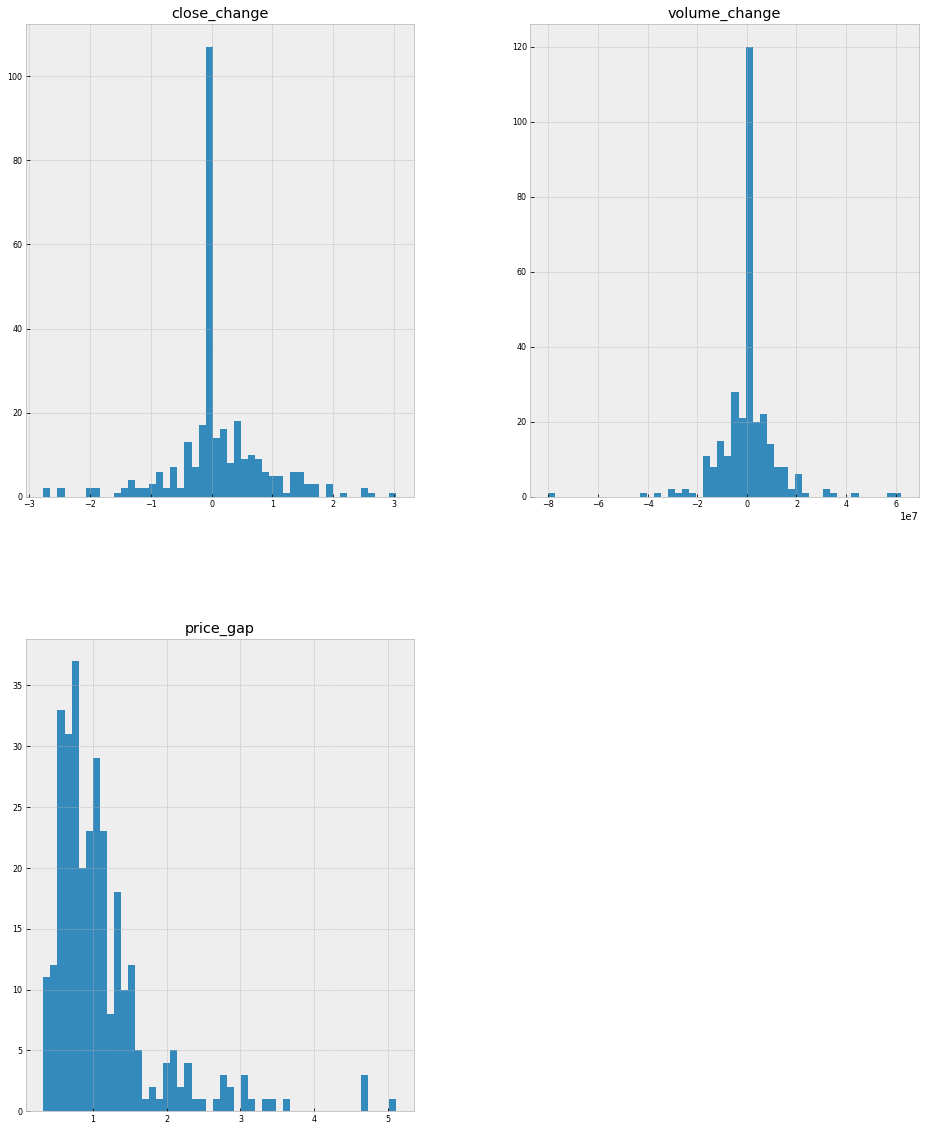

Analysing month:  8


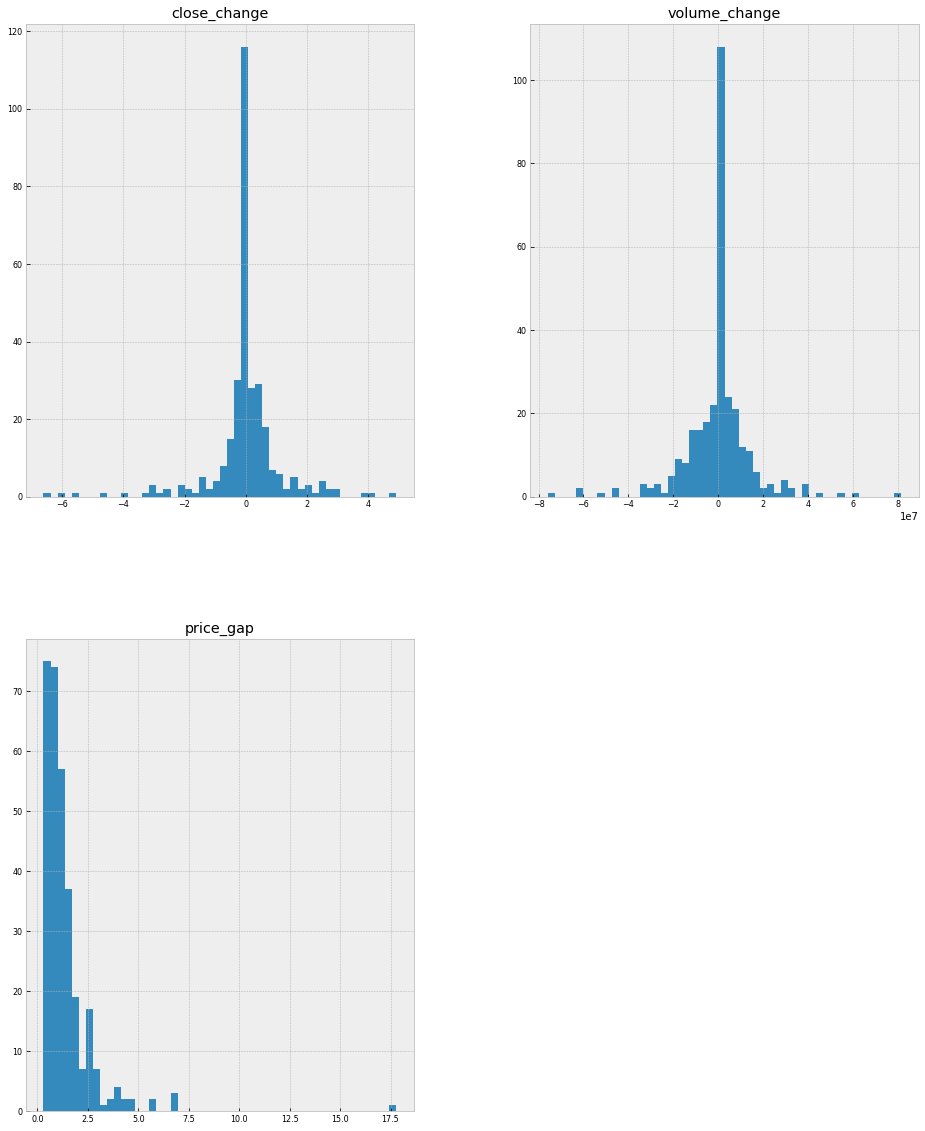

Analysing month:  9


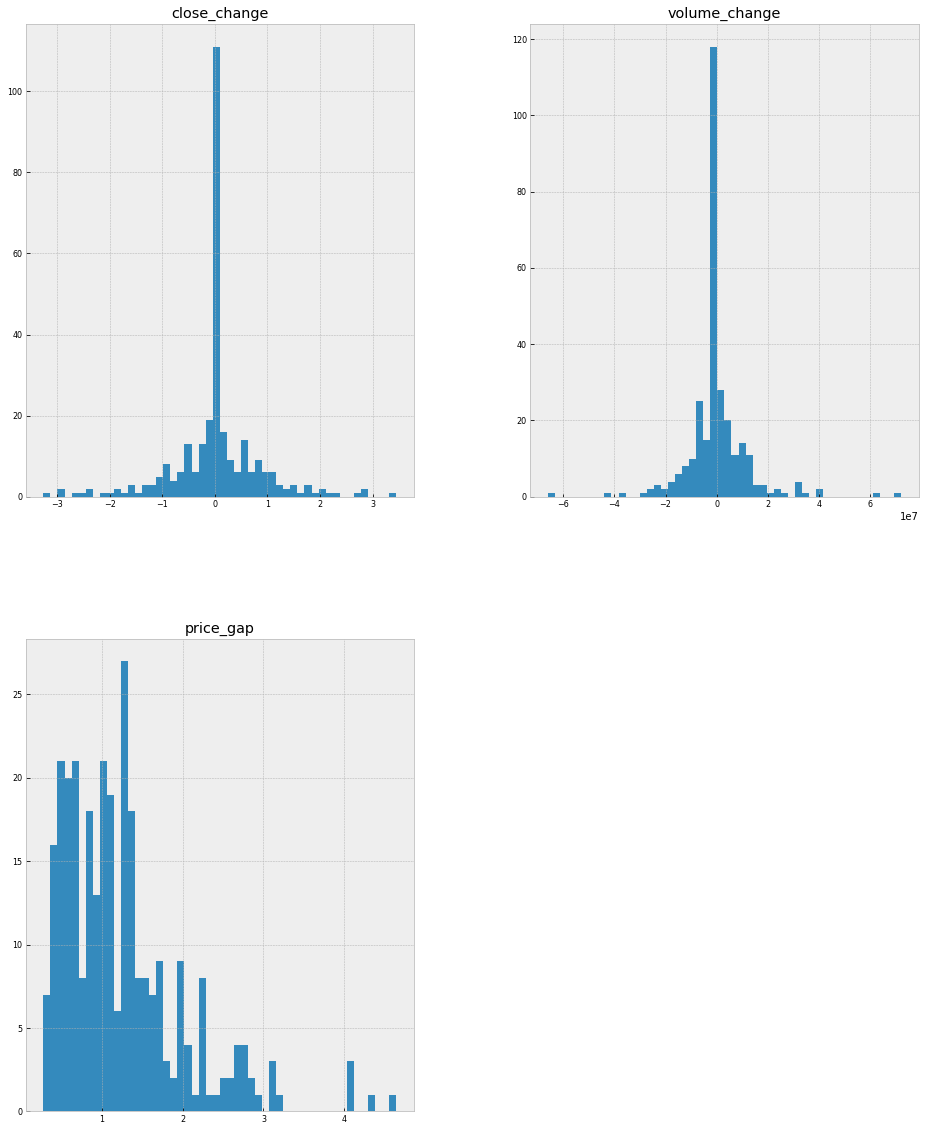

Analysing month:  10


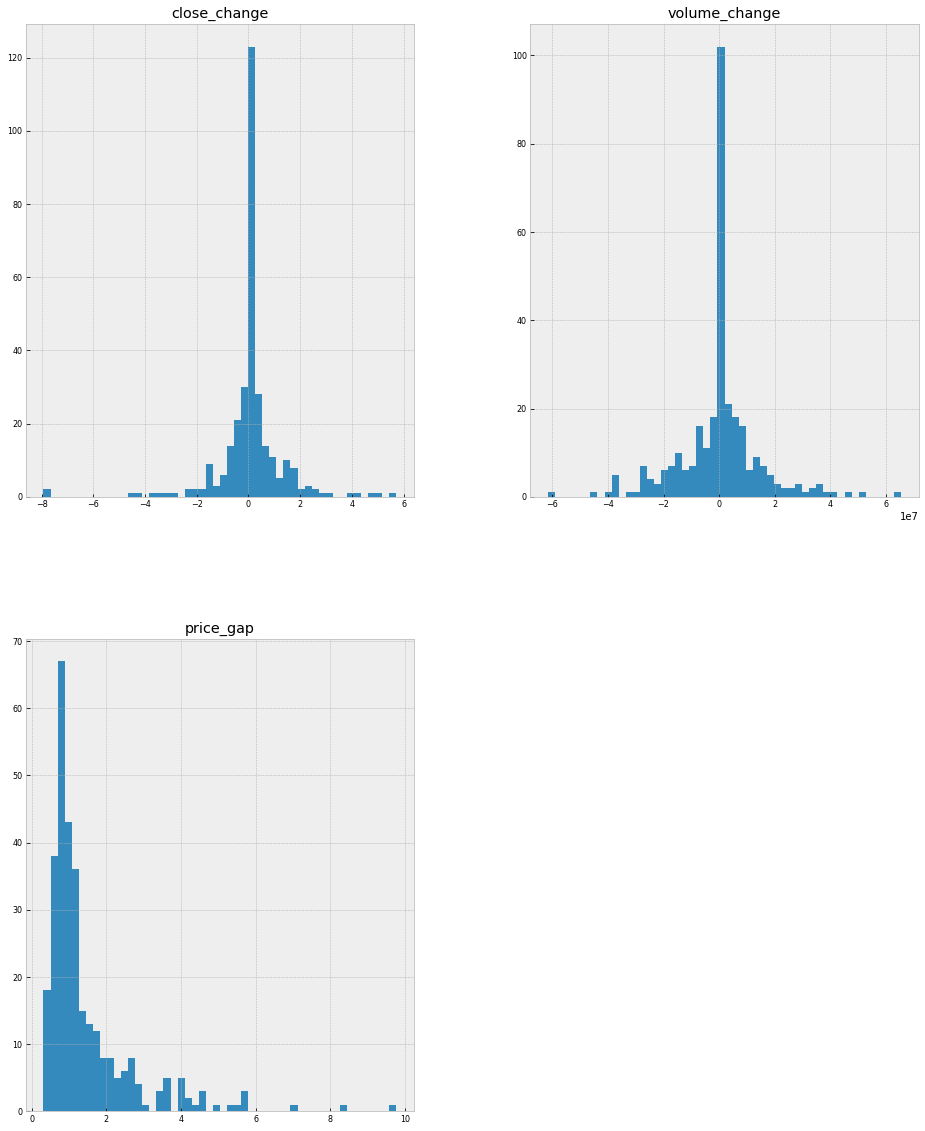

Analysing month:  11


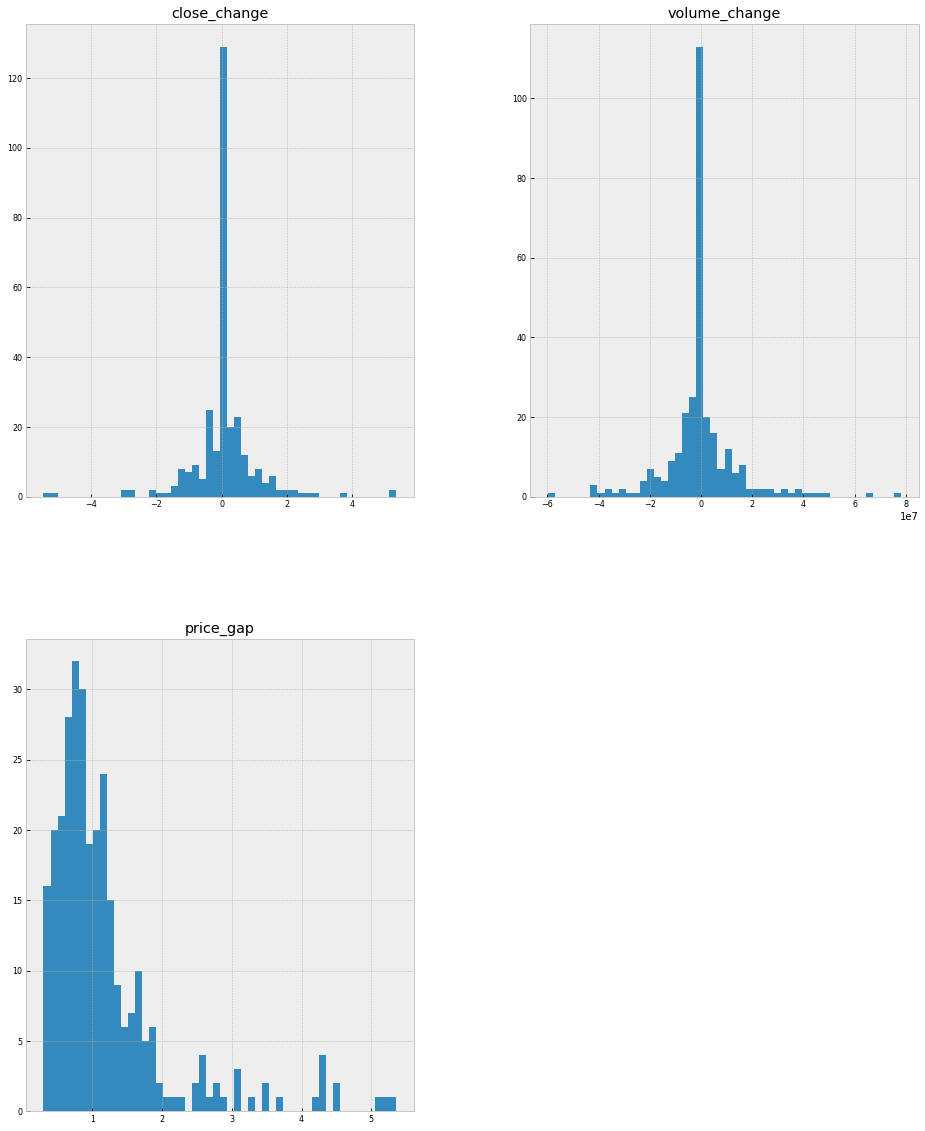

Analysing month:  12


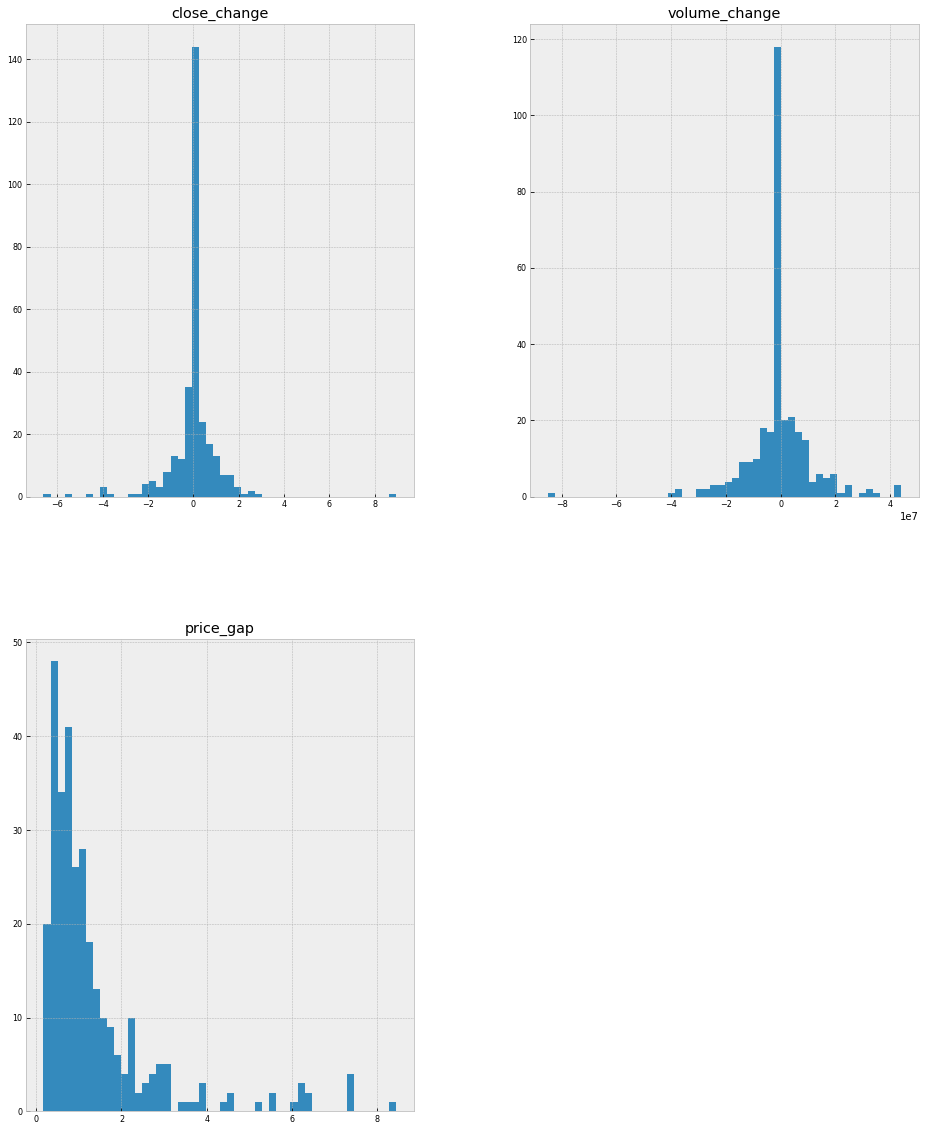

In [52]:
for month, data in gaps_QQQ_month:
    print('Analysing month: ', month)
    data.drop(columns=['month']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()

In [53]:
gaps_QQQ_month.mean()

,close_change,volume_change,price_gap
month,,,
1,0.087355,758254.838710,1.237935
2,0.091773,-764683.687943,1.234468
3,0.035645,-38110.000000,1.211065
4,0.054200,270374.666667,1.216000
5,0.010548,15897.419355,1.193452
6,0.011533,-88879.000000,1.213767
7,0.121355,53610.322581,1.129935
8,0.018194,-291250.322581,1.373645
9,0.017767,411153.333333,1.241733


In [54]:
gaps_QQQ_month.var()

,close_change,volume_change,price_gap
month,,,
1,1.020049,1.854155e+14,0.815947
2,1.019328,2.335701e+14,1.388573
3,0.953299,1.786907e+14,1.174496
4,0.775091,2.201452e+14,0.839038
5,0.821921,3.421287e+14,0.728541
6,0.969305,1.904585e+14,0.651717
7,0.610351,1.374617e+14,0.528201
8,1.424914,2.352644e+14,2.005291
9,0.754371,1.465246e+14,0.564594


In [83]:
gaps_QQQ_month.describe()

close_change                                                         \
             count      mean       std       min       25%  50%       75%   
month                                                                       
1            310.0  0.087355  1.009975 -5.059998 -0.047500  0.0  0.280005   
2            282.0  0.091773  1.009618 -6.760010 -0.020000  0.0  0.379997   
3            310.0  0.035645  0.976370 -5.319992 -0.137499  0.0  0.267498   
4            300.0  0.054200  0.880393 -4.620010 -0.112500  0.0  0.362501   
5            310.0  0.010548  0.906599 -6.419998 -0.177502  0.0  0.275000   
6            300.0  0.011533  0.984533 -4.479996 -0.265001  0.0  0.372496   
7            310.0  0.121355  0.781250 -2.770004 -0.059998  0.0  0.420004   
8            310.0  0.018194  1.193698 -6.620010 -0.187502  0.0  0.367496   
9            300.0  0.017767  0.868545 -3.259995 -0.190002  0.0  0.260000   
10           310.0  0.065516  1.293330 -7.930008 -0.179998  0.0  0.380004   
11           300.0  0.061733  1.009884 -5.440002 -0.122496  0.0  0.320000   
12           309.0 -0.025761  1.152463 -6.610001 -0.139999  0.0  0.209999   

                volume_change                                            \
            max         count           mean           std          min   
month                                                                     
1      6.409988         310.0  758254.838710  1.361674e+07  -52788600.0   
2      4.190002         282.0 -764683.687943  1.528300e+07 -119264200.0   
3      5.889999         310.0  -38110.000000  1.336752e+07  -82073200.0   
4      3.500000         300.0  270374.666667  1.483729e+07  -47217400.0   
5      3.069992         310.0   15897.419355  1.849672e+07 -152158800.0   
6      4.790009         300.0  -88879.000000  1.380067e+07  -53261000.0   
7      3.040009         310.0   53610.322581  1.172441e+07  -80129700.0   
8      4.940002         310.0 -291250.322581  1.533833e+07  -75741600.0   
9      3.449997         300.0  411153.333333  1.210473e+07  -65944900.0   
10     5.720001         310.0 -282494.516129  1.480389e+07  -61505500.0   
11     5.339996         300.0   25971.666667  1.451111e+07  -59687000.0   
12     8.960007         309.0 -210810.679612  1.212725e+07  -84966100.0   

                                              price_gap                      \
             25%  50%        75%          max     count      mean       std   
month                                                                         
1     -2734025.0  0.0  2651325.0   69703800.0     310.0  1.237935  0.903298   
2     -4230950.0  0.0  2936375.0   61966100.0     282.0  1.234468  1.178377   
3     -4765075.0  0.0  3930800.0   75231200.0     310.0  1.211065  1.083742   
4     -4229400.0  0.0  4472600.0  100894100.0     300.0  1.216000  0.915990   
5     -3254475.0  0.0  3595175.0  145796600.0     310.0  1.193452  0.853546   
6     -5074850.0  0.0  2872100.0   84366300.0     300.0  1.213767  0.807290   
7     -3451150.0  0.0  3456250.0   62055300.0     310.0  1.129935  0.726774   
8     -4567025.0  0.0  4901650.0   81281800.0     310.0  1.373645  1.416083   
9     -3371875.0  0.0  2921900.0   71947500.0     300.0  1.241733  0.751395   
10    -5577100.0  0.0  5035700.0   65373200.0     310.0  1.474001  1.268996   
11    -4066650.0  0.0  2578175.0   78088300.0     300.0  1.186934  0.881812   
12    -3712300.0  0.0  3521600.0   43932300.0     309.0  1.374207  1.414688   

                                                          
            min       25%       50%       75%        max  
month                                                     
1      0.220001  0.570000  0.910004  1.647507   5.259995  
2      0.270000  0.550003  0.805004  1.419998   7.750000  
3      0.200001  0.549999  0.839998  1.415001   7.940002  
4      0.240002  0.650002  0.930000  1.492493   6.190002  
5      0.300003  0.659988  0.970001  1.374998   5.680000  
6      0.309998  0.720001  1.039997  1.370003   5.789993  
7      

Analysis by years

In [73]:
#AAPL
df_AAPL['year'] = df_AAPL.rec_date.dt.year
gaps_AAPL_year = df_AAPL[['year','close_change','volume_change','price_gap']].groupby(['year'])

Analysing year:  2010


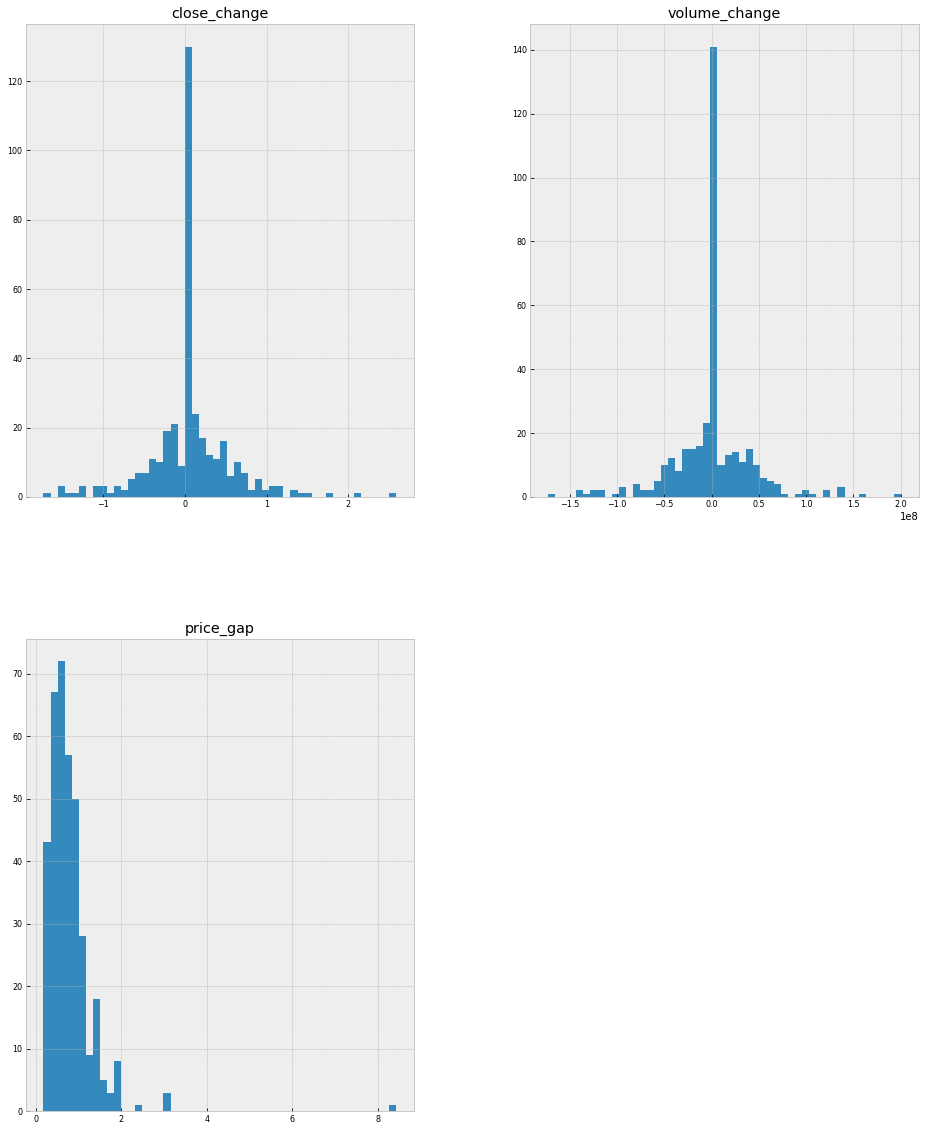

Analysing year:  2011


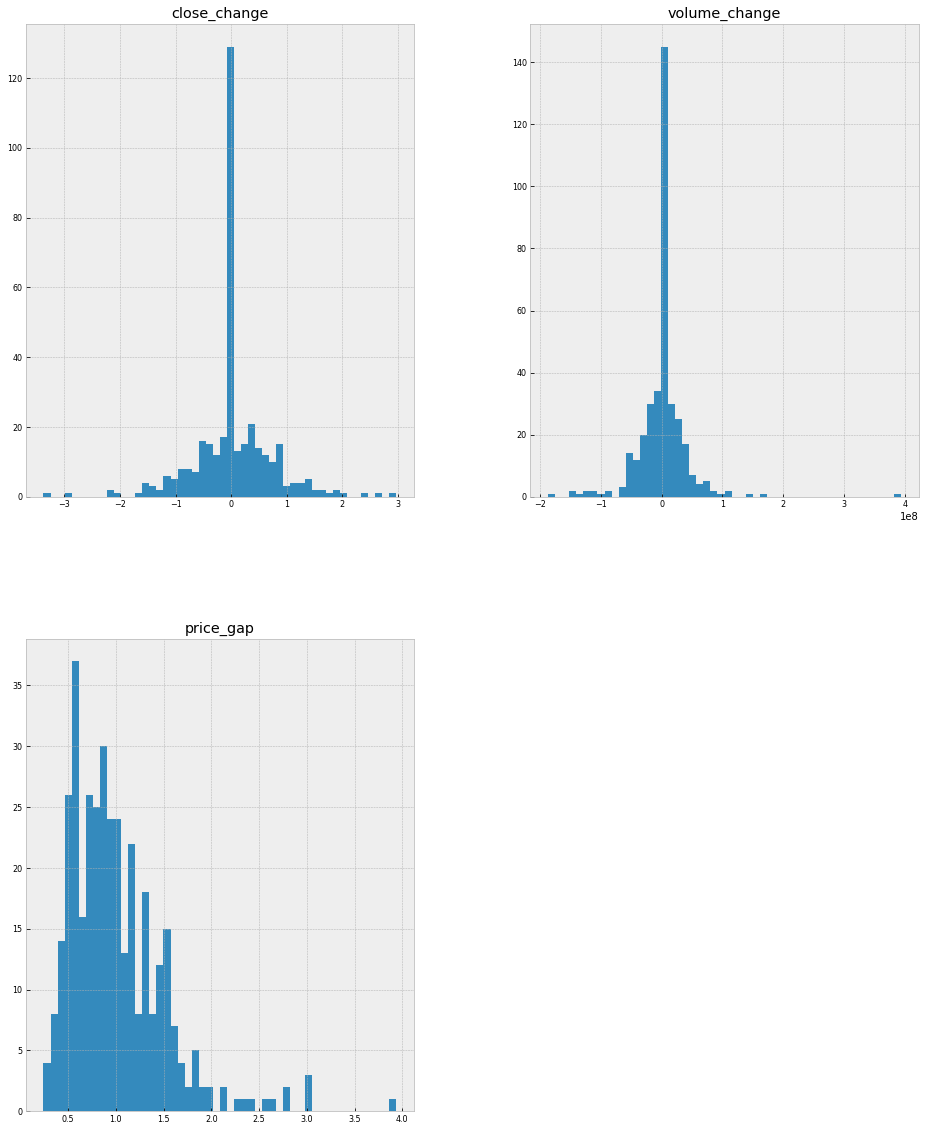

Analysing year:  2012


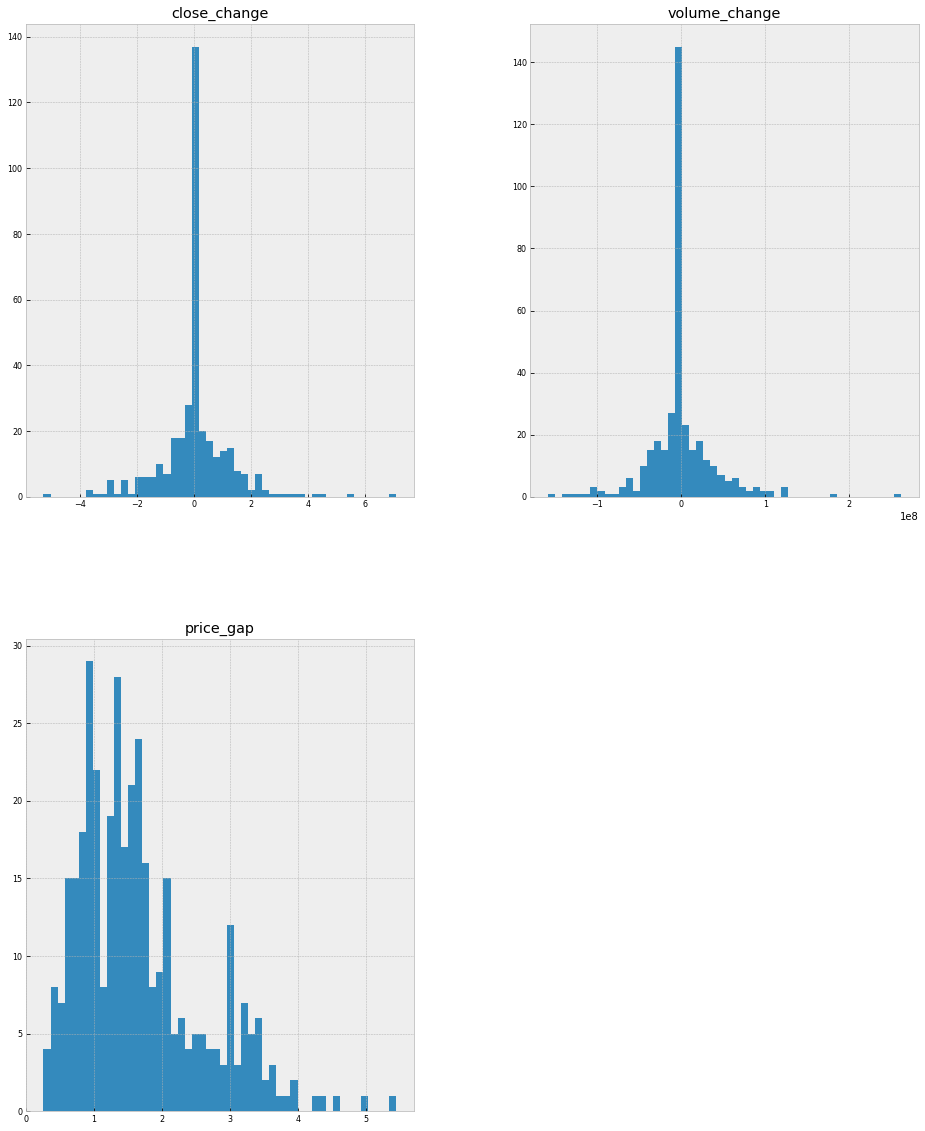

Analysing year:  2013


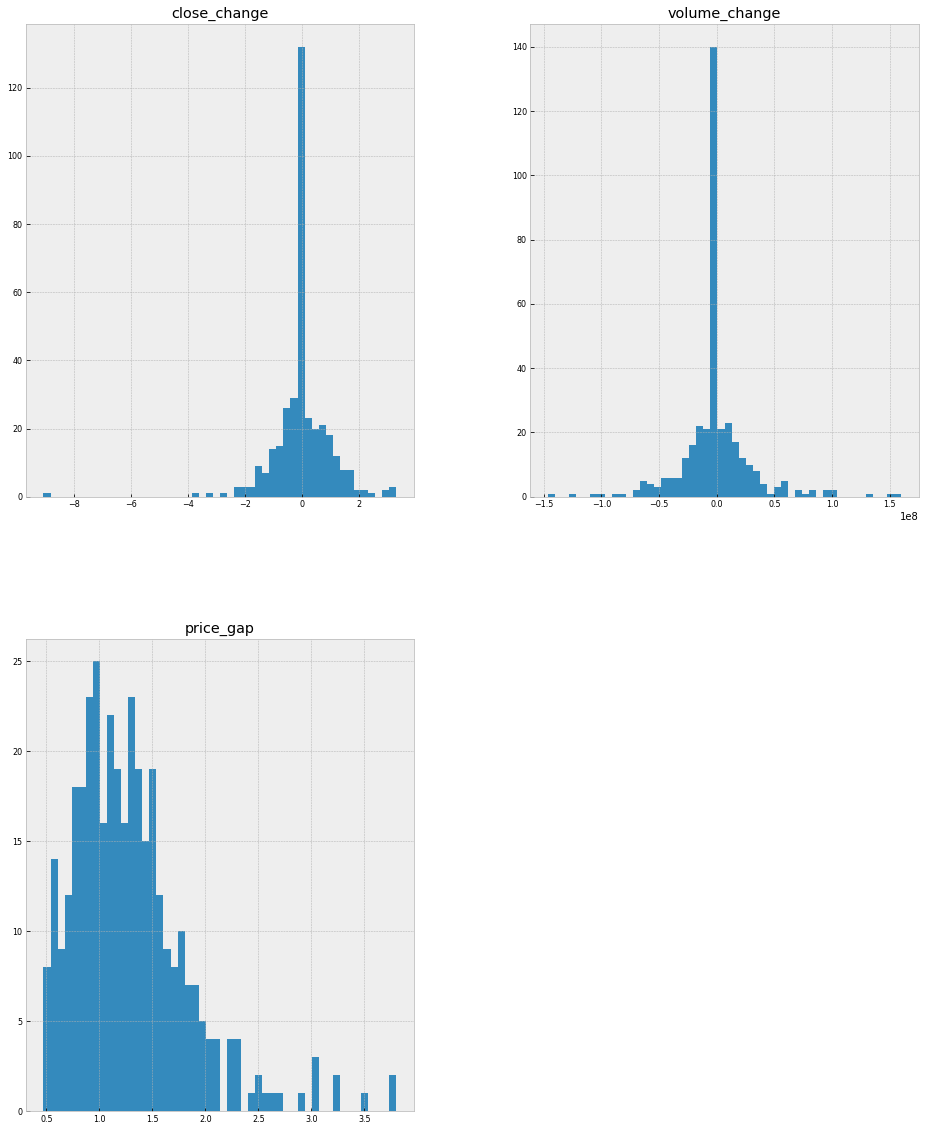

Analysing year:  2014


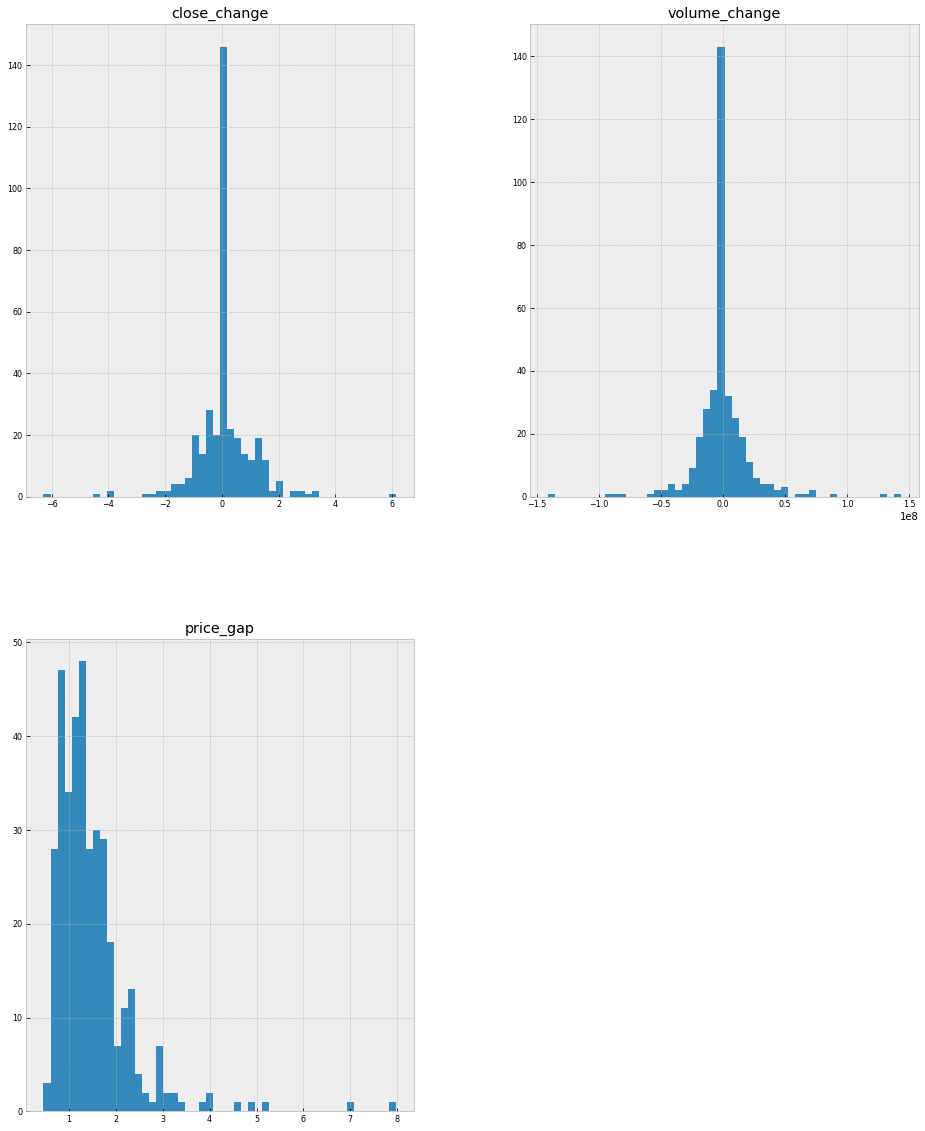

Analysing year:  2015


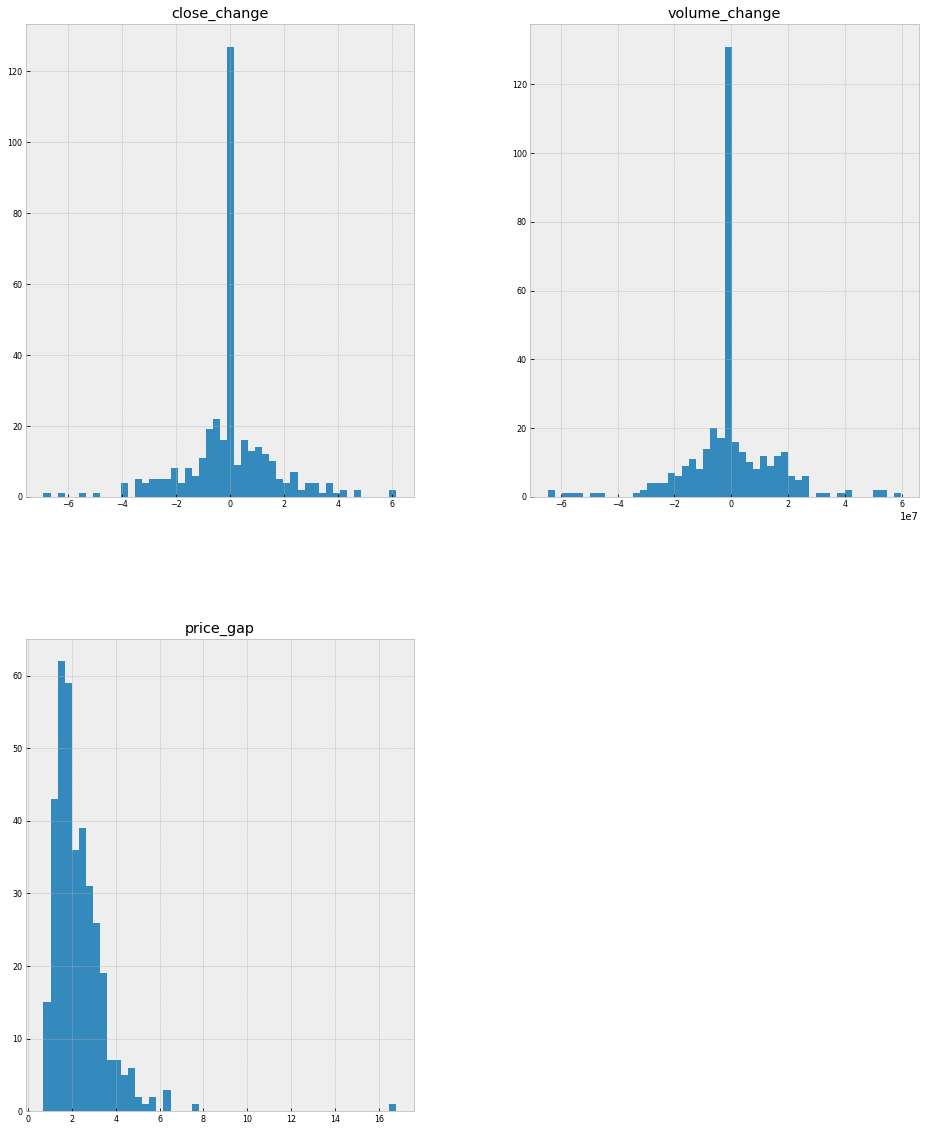

Analysing year:  2016


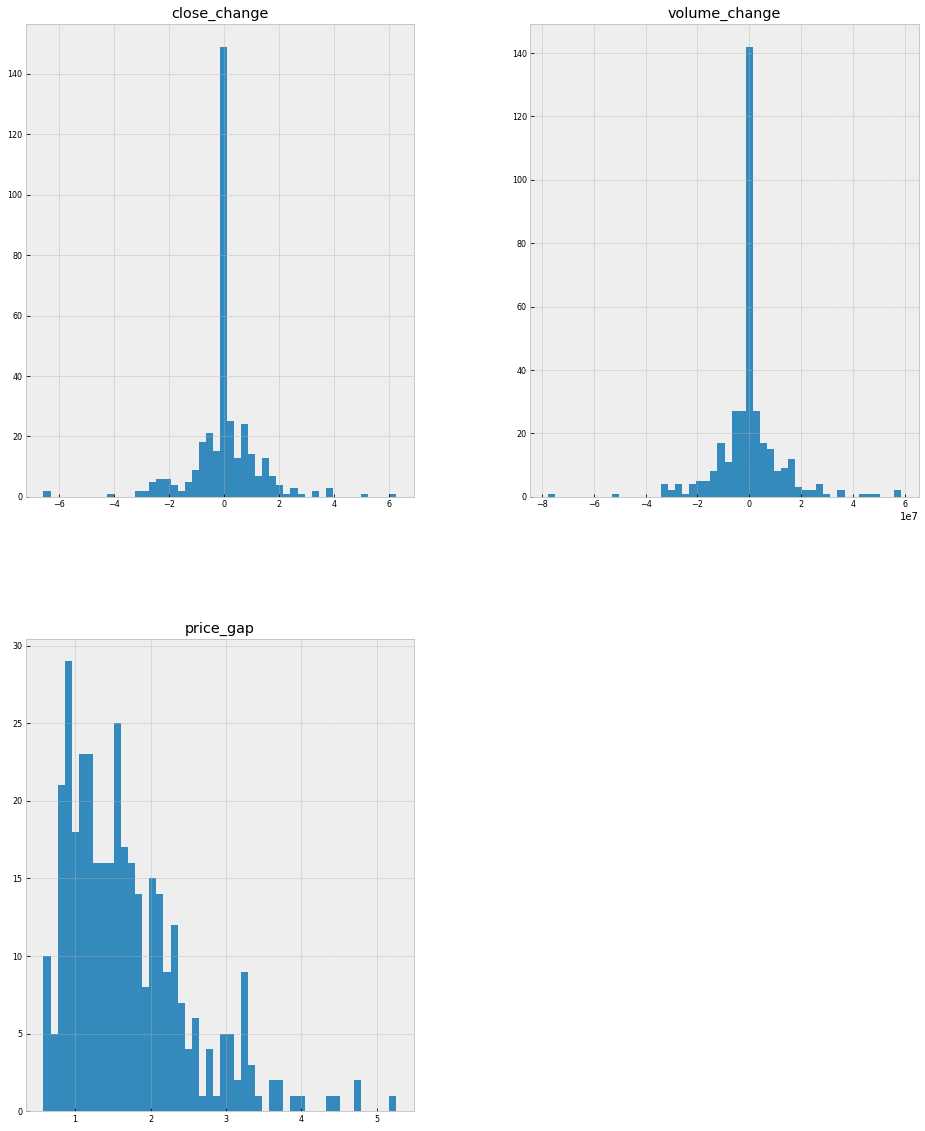

Analysing year:  2017


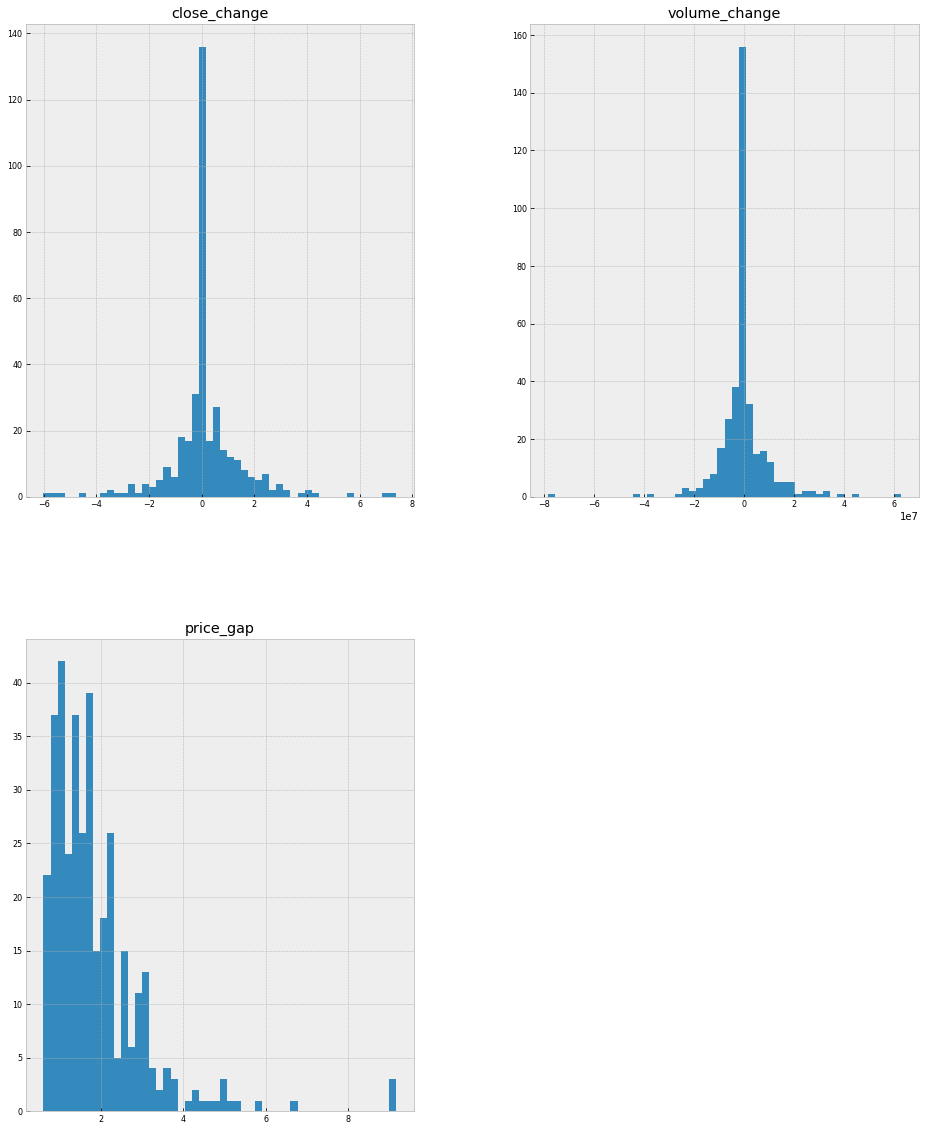

Analysing year:  2018


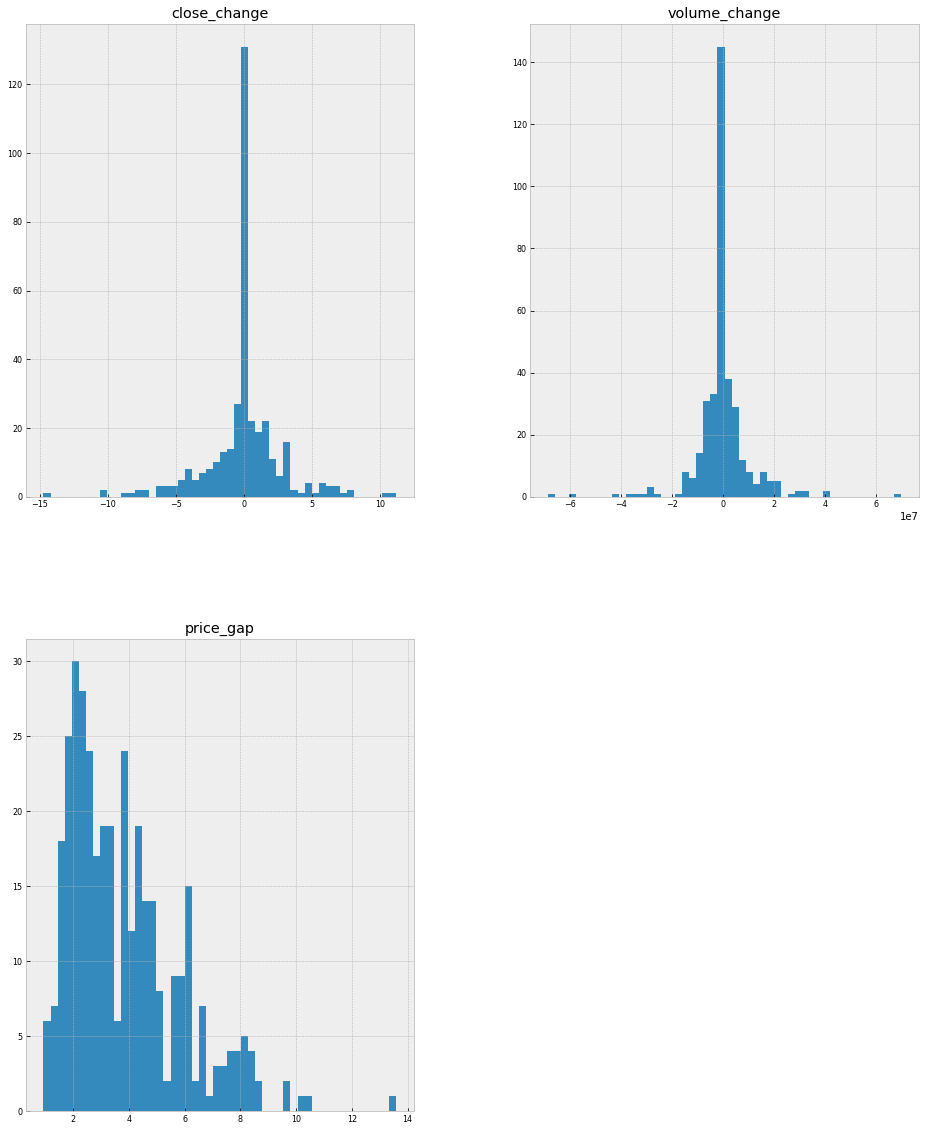

Analysing year:  2019


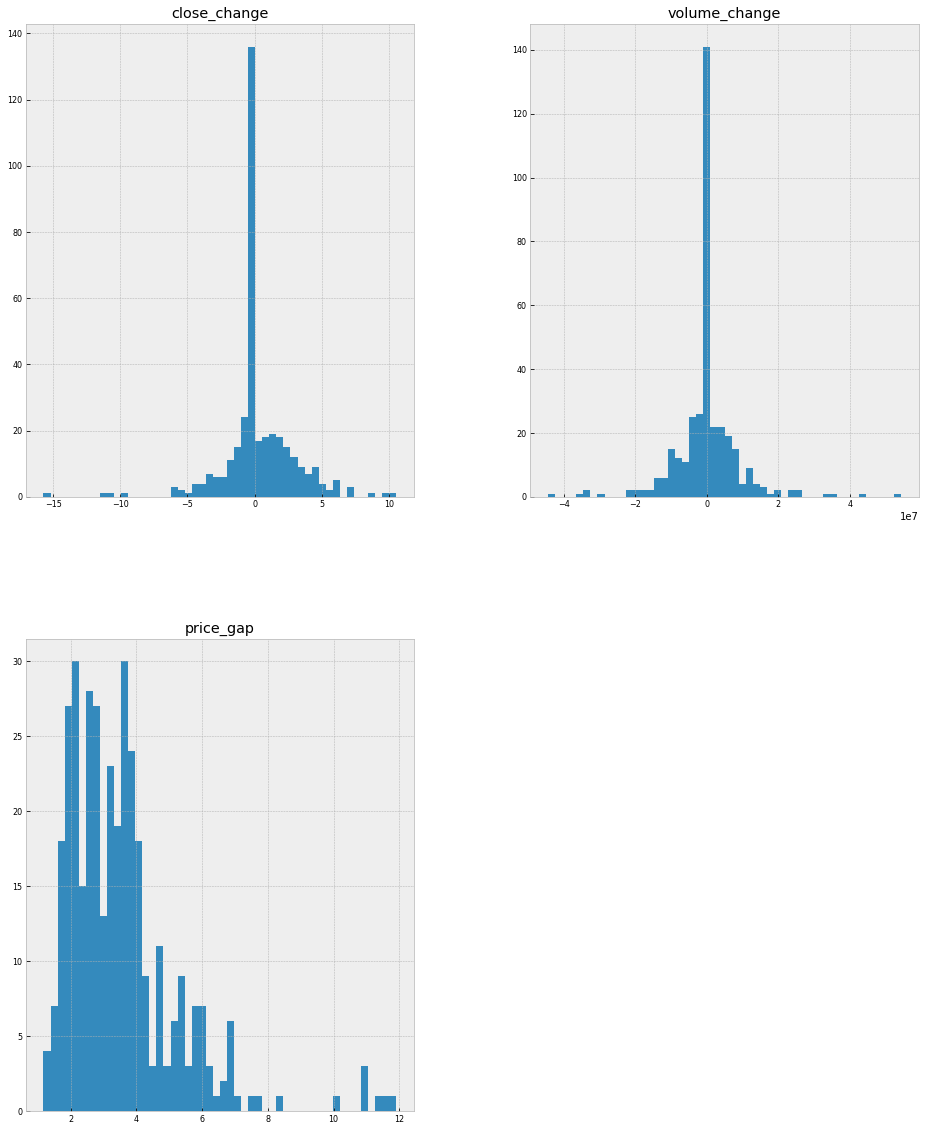

In [76]:
for year, data in gaps_AAPL_year:
    print('Analysing year: ', year)
    data.drop(columns=['year']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()

In [77]:
gaps_AAPL_year.mean()

,close_change,volume_change,price_gap
year,,,
2010,0.043769,-108837.534247,0.784622
2011,0.032266,-9483.561644,1.002399
2012,0.049637,327753.005464,1.649149
2013,0.011292,-298909.589041,1.288426
2014,0.082834,-39363.561644,1.479382
2015,-0.014027,-1345.479452,2.320247
2016,0.028852,-28213.114754,1.689918
2017,0.146329,-12565.479452,1.858137
2018,-0.031479,24667.397260,3.814959


In [78]:
gaps_AAPL_year.var()

,close_change,volume_change,price_gap
year,,,
2010,0.251207,1.770495e+15,0.348333
2011,0.522426,1.750129e+15,0.255311
2012,1.563429,1.620923e+15,0.817039
2013,1.034377,1.024947e+15,0.300644
2014,1.067884,5.165061e+14,0.666367
2015,2.670322,2.433118e+14,1.699449
2016,1.546728,1.616154e+14,0.645086
2017,1.965506,1.084934e+14,1.351200
2018,7.894216,1.203020e+14,3.994962


In [81]:
gaps_AAPL_year.describe()

close_change                                                          \
            count      mean       std        min       25%  50%       75%   
year                                                                        
2010        365.0  0.043769  0.501205  -1.732857 -0.137142  0.0  0.228569   
2011        365.0  0.032266  0.722790  -3.374287 -0.227142  0.0  0.350002   
2012        366.0  0.049637  1.250371  -5.294281 -0.302853  0.0  0.452862   
2013        365.0  0.011292  1.017043  -9.072861 -0.338570  0.0  0.414284   
2014        365.0  0.082834  1.033385  -6.285721 -0.231430  0.0  0.421425   
2015        365.0 -0.014027  1.634112  -6.889999 -0.580002  0.0  0.619995   
2016        366.0  0.028852  1.243675  -6.570000 -0.220001  0.0  0.410004   
2017        365.0  0.146329  1.401965  -6.010010 -0.220001  0.0  0.559998   
2018        365.0 -0.031479  2.809665 -14.740005 -0.630005  0.0  1.080002   
2019        364.0  0.367527  2.675359 -15.729996 -0.322506  0.0  1.482506   

                volume_change                                            \
            max         count           mean           std          min   
year                                                                      
2010   2.590000         365.0 -108837.534247  4.207726e+07 -172928000.0   
2011   2.971428         365.0   -9483.561644  4.183455e+07 -186346300.0   
2012   7.102859         366.0  327753.005464  4.026068e+07 -158582200.0   
2013   3.318573         365.0 -298909.589041  3.201480e+07 -146203400.0   
2014   6.145714         365.0  -39363.561644  2.272677e+07 -140678300.0   
2015   6.169998         365.0   -1345.479452  1.559845e+07  -64451100.0   
2016   6.279999         366.0  -28213.114754  1.271280e+07  -77690900.0   
2017   7.400002         365.0  -12565.479452  1.041602e+07  -78274600.0   
2018  11.210007         365.0   24667.397260  1.096823e+07  -68553300.0   
2019  10.570007         364.0    2816.208791  9.126232e+06  -44351500.0   

                                               price_gap                      \
             25%  50%         75%          max     count      mean       std   
year                                                                           
2010 -13545000.0  0.0  12618200.0  200352600.0     365.0  0.784622  0.590197   
2011 -11880400.0  0.0  11768400.0  393039500.0     365.0  1.002399  0.505283   
2012 -10899700.0  0.0   8984325.0  261430400.0     366.0  1.649149  0.903902   
2013 -10459400.0  0.0   8029000.0  159821200.0     365.0  1.288426  0.548310   
2014  -6427400.0  0.0   5043000.0  143489600.0     365.0  1.479382  0.816313   
2015  -5606300.0  0.0   5094600.0   59773900.0     365.0  2.320247  1.303629   
2016  -3823800.0  0.0   2662325.0   58585900.0     366.0  1.689918  0.803173   
2017  -2679500.0  0.0   1293200.0   62784000.0     365.0  1.858137  1.162411   
2018  -3270000.0  0.0   2251700.0   69637900.0     365.0  3.814959  1.998740   
2019  -2829800.0  0.0   2785475.0   54272500.0     364.0  3.526814  1.720927   

                                                         
           min       25%       50%       75%        max  
year                                                     
2010  0.180000  0.455715  0.677143  0.964287   8.428572  
2011  0.242859  0.628571  0.895714  1.232857   3.937145  
2012  0.255714  0.970003  1.445717  2.051430   5.441429  
2013  0.471428  0.911427  1.195717  1.508568   3.801430  
2014  0.459999  0.969994  1.292854  1.738571   7.980003  
2015  0.699997  1.489998  1.989998  2.800003  16.800003  
2016  0.579994  1.070000  1.534996  2.087498   5.259995  
2017  0.599998  1.099991  1.580002  2.220001   9.169998  
2018  0.940002  2.239990  3.260010  4.850006  13.600006  
2019  1.170013  2.337498  3.269997  4.089996  11.910004

In [84]:
#QQQ
df_QQQ['year'] = df_QQQ.rec_date.dt.year
gaps_QQQ_year = df_QQQ[['year','close_change','volume_change','price_gap']].groupby(['year'])

Analysing year:  2010


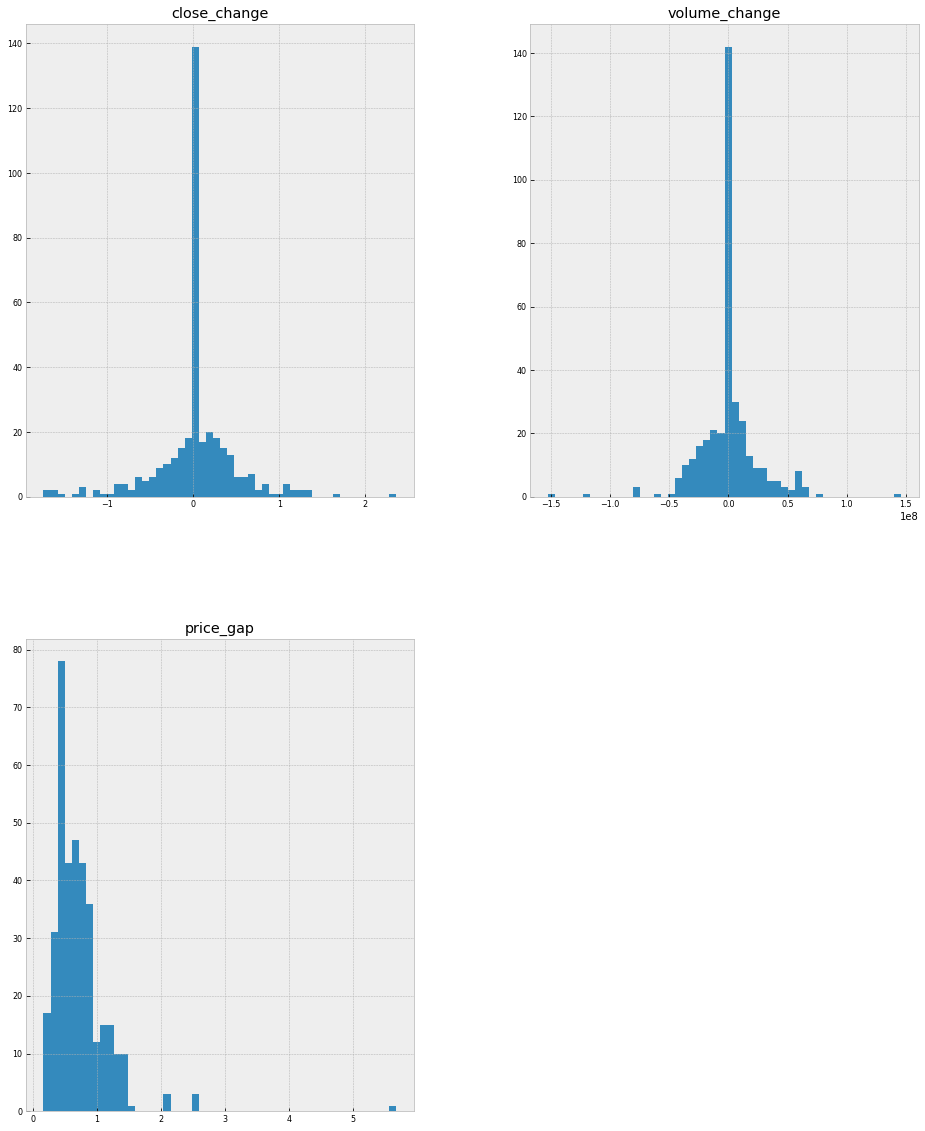

Analysing year:  2011


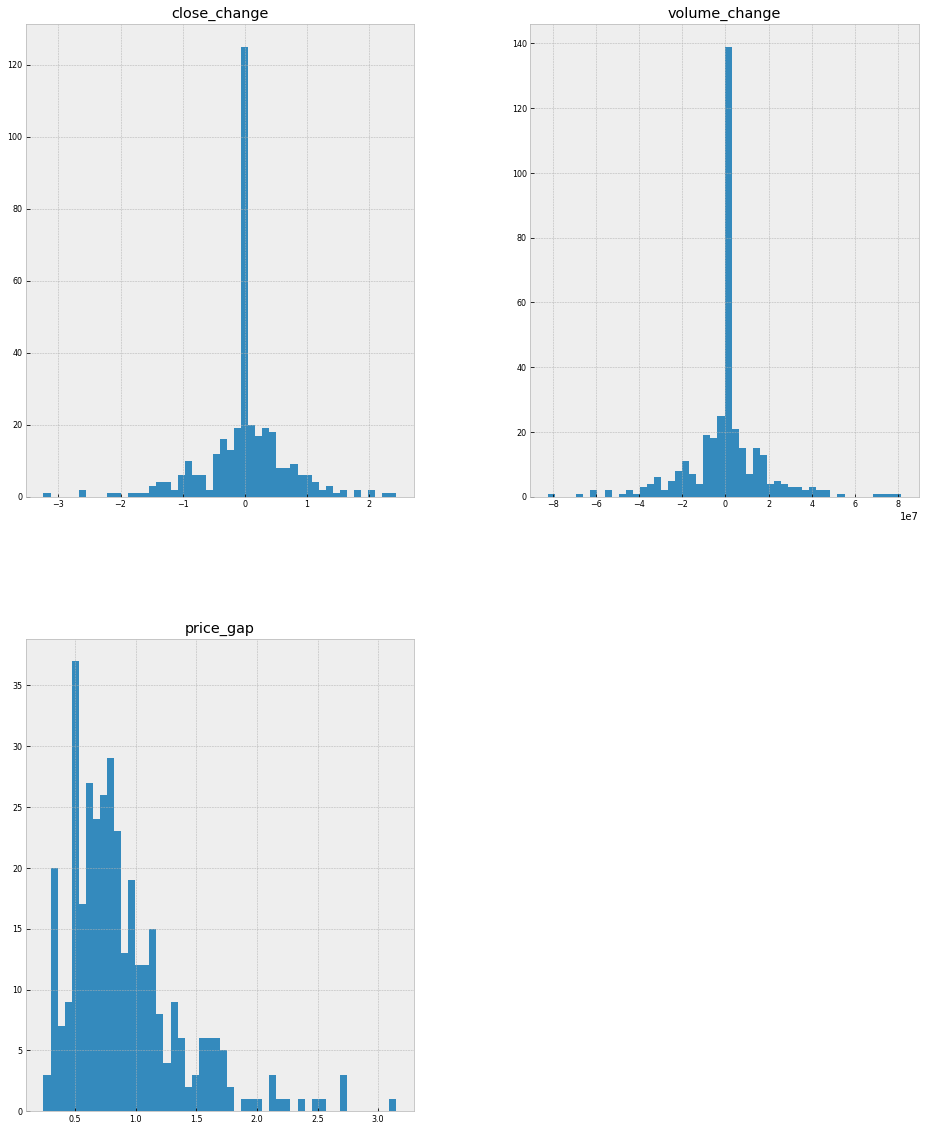

Analysing year:  2012


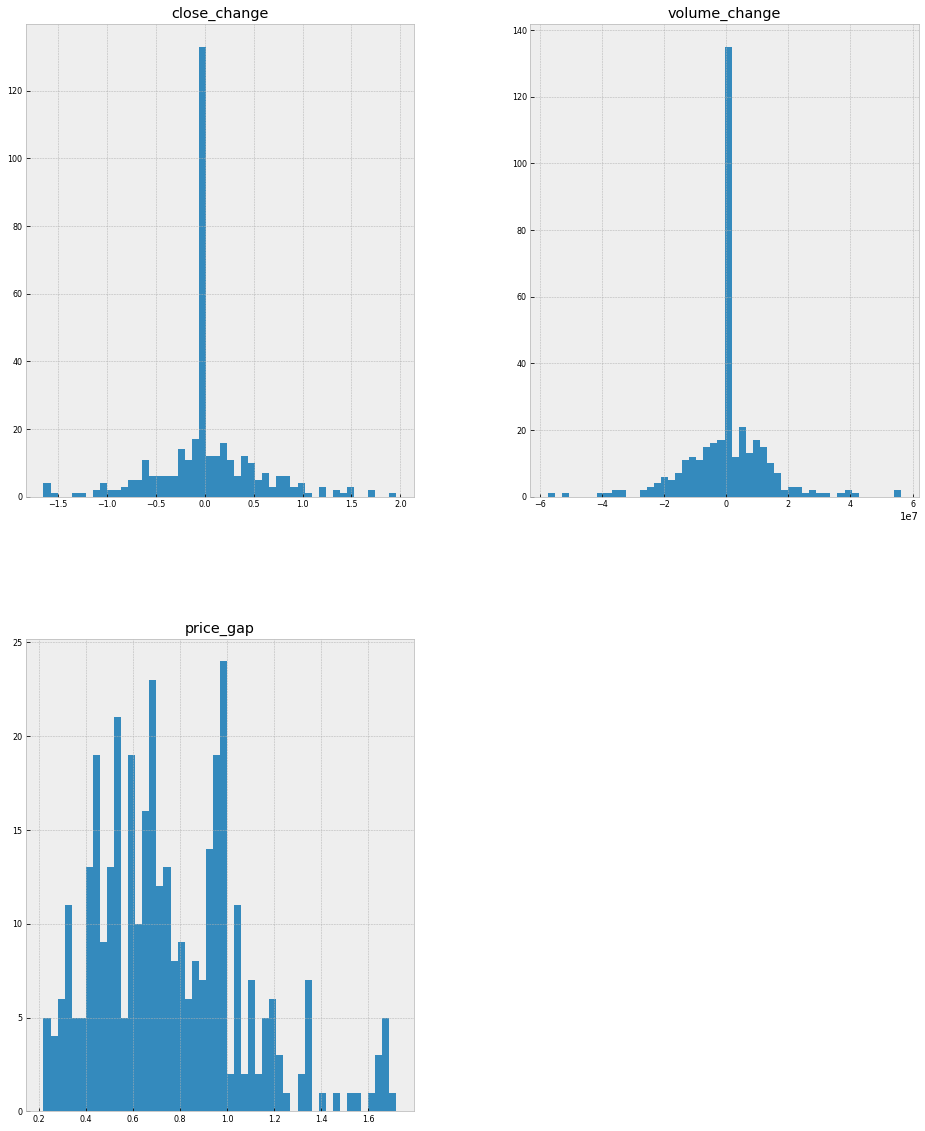

Analysing year:  2013


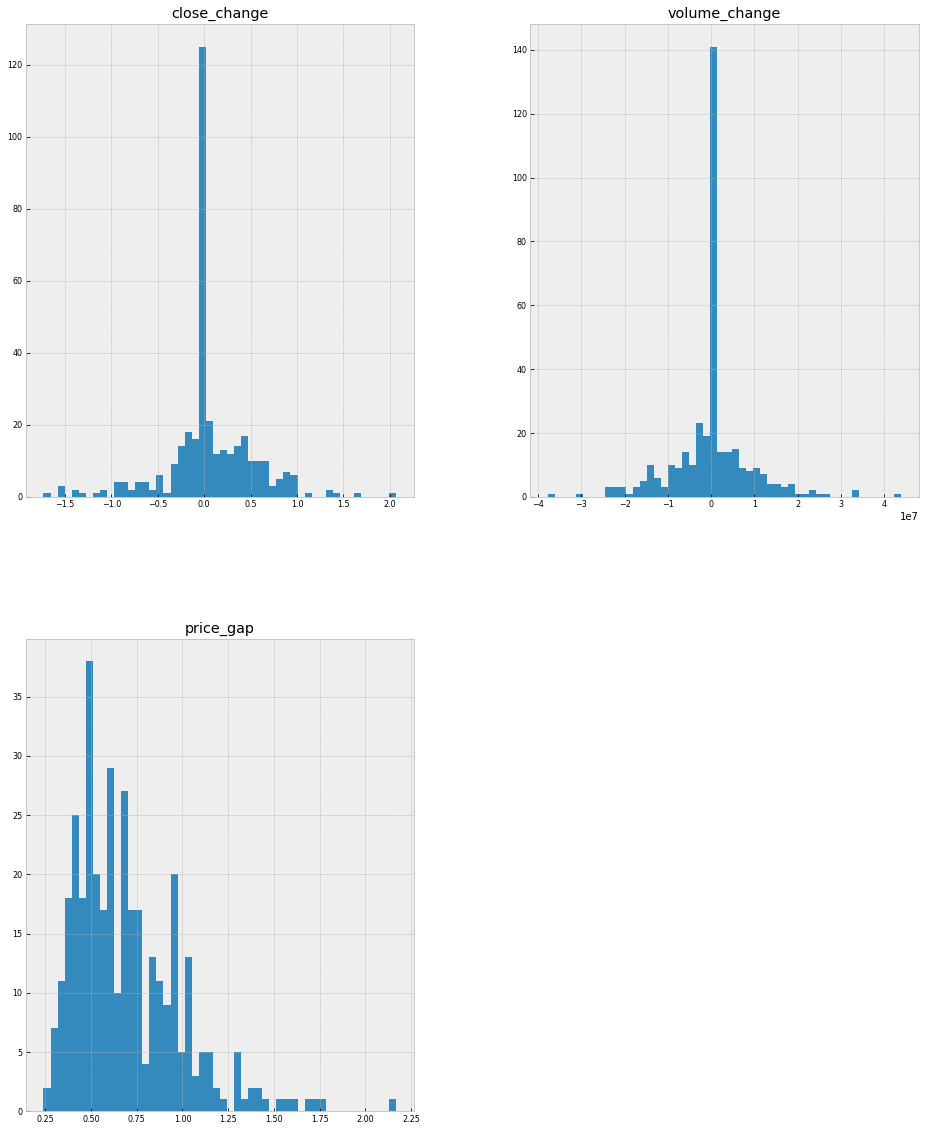

Analysing year:  2014


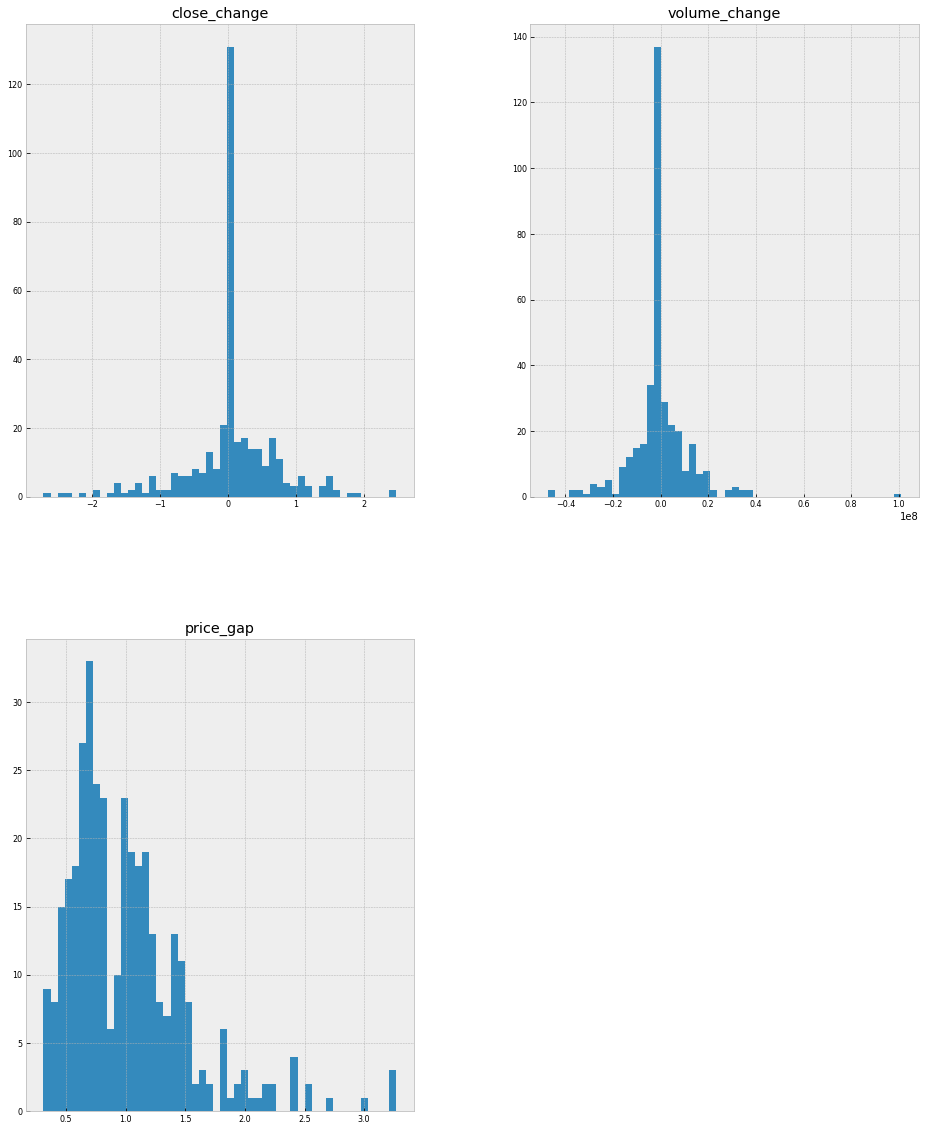

Analysing year:  2015


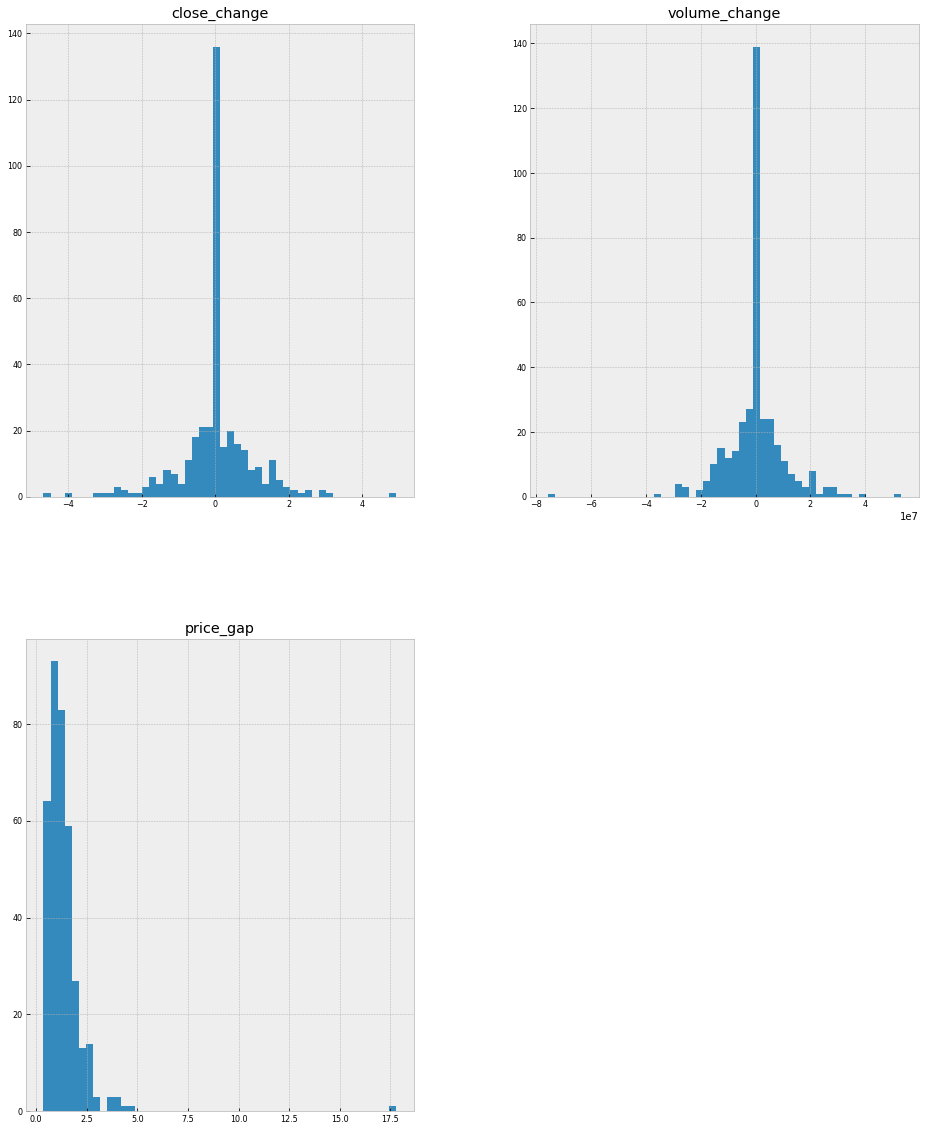

Analysing year:  2016


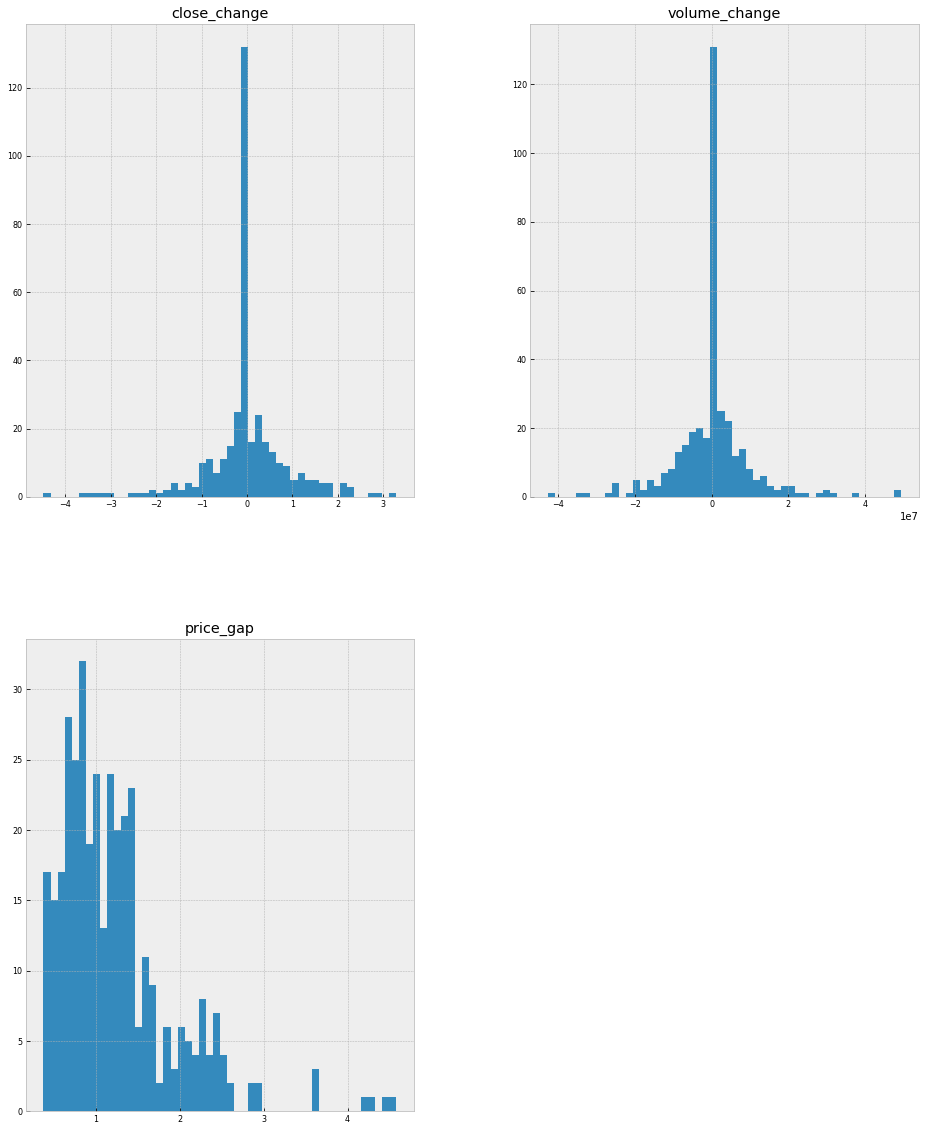

Analysing year:  2017


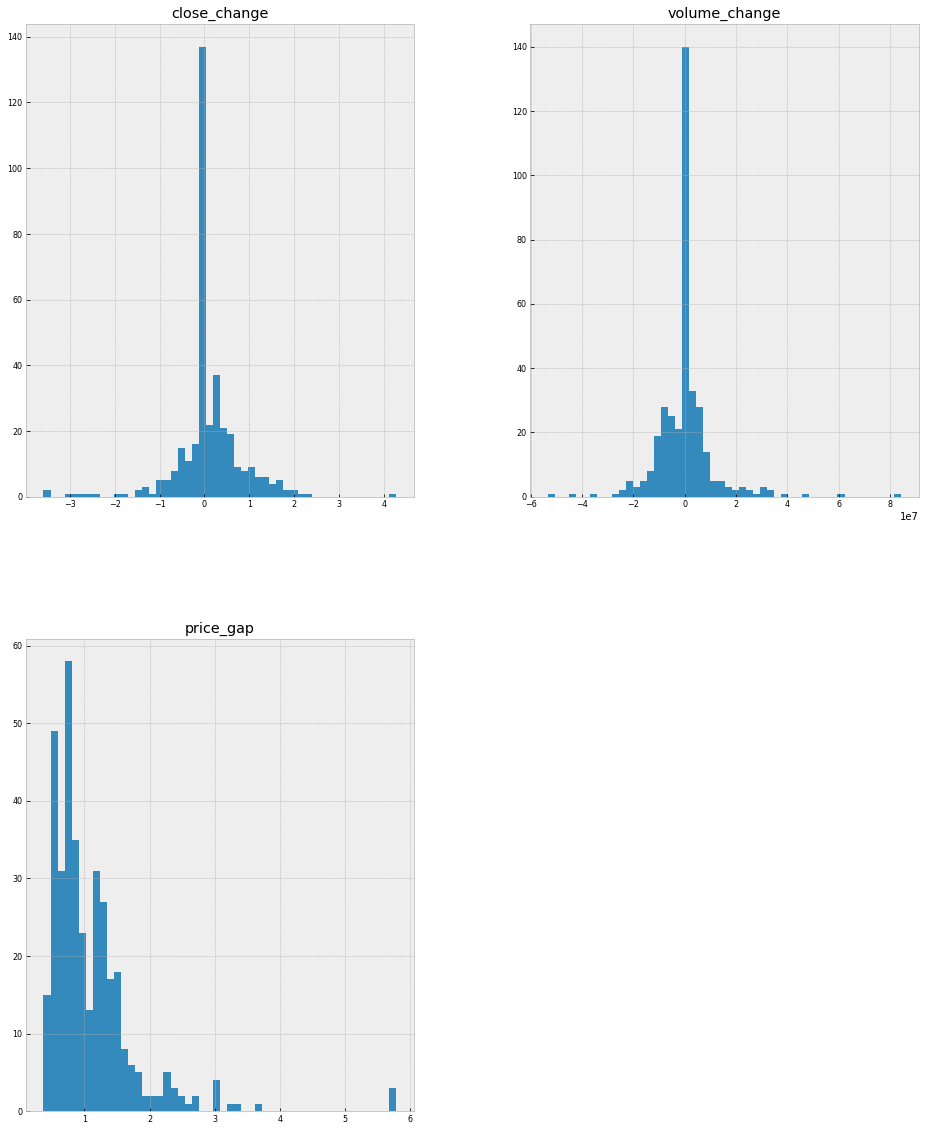

Analysing year:  2018


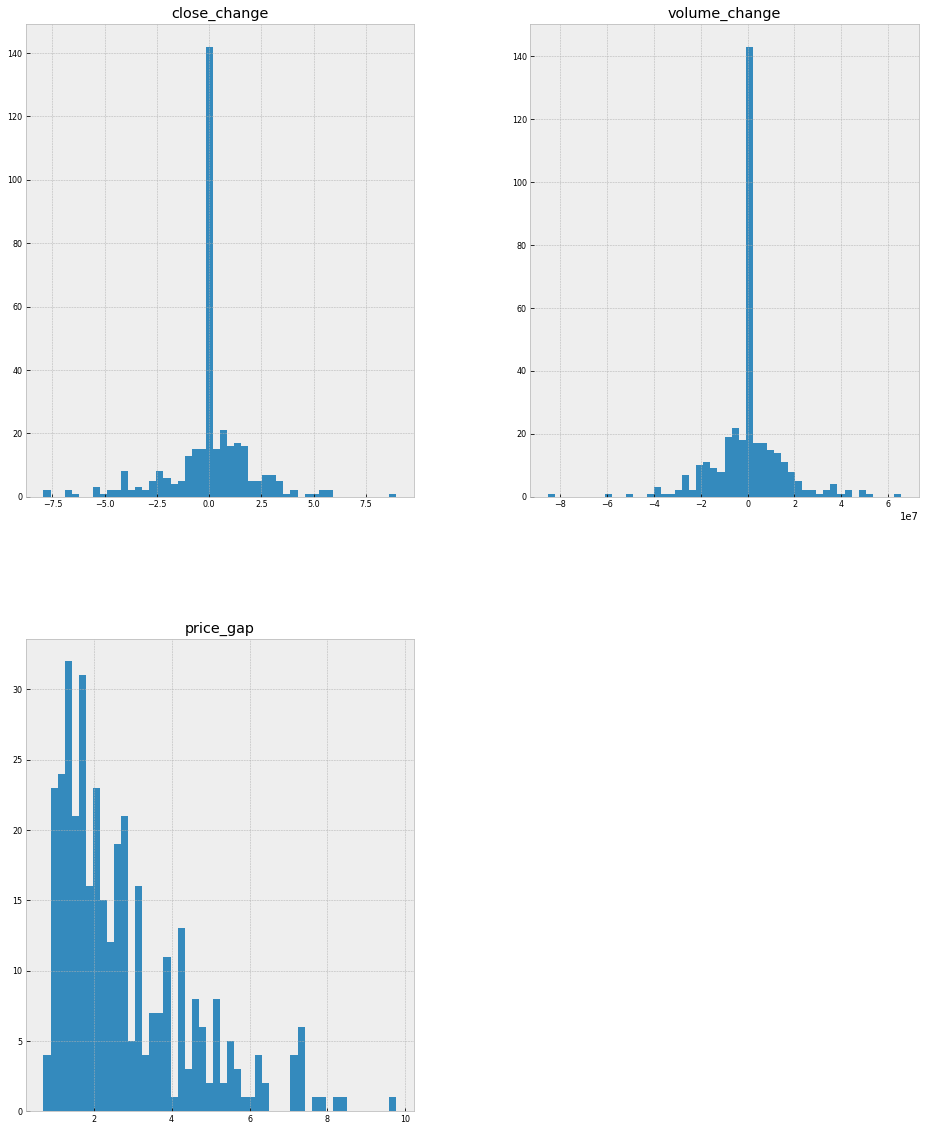

Analysing year:  2019


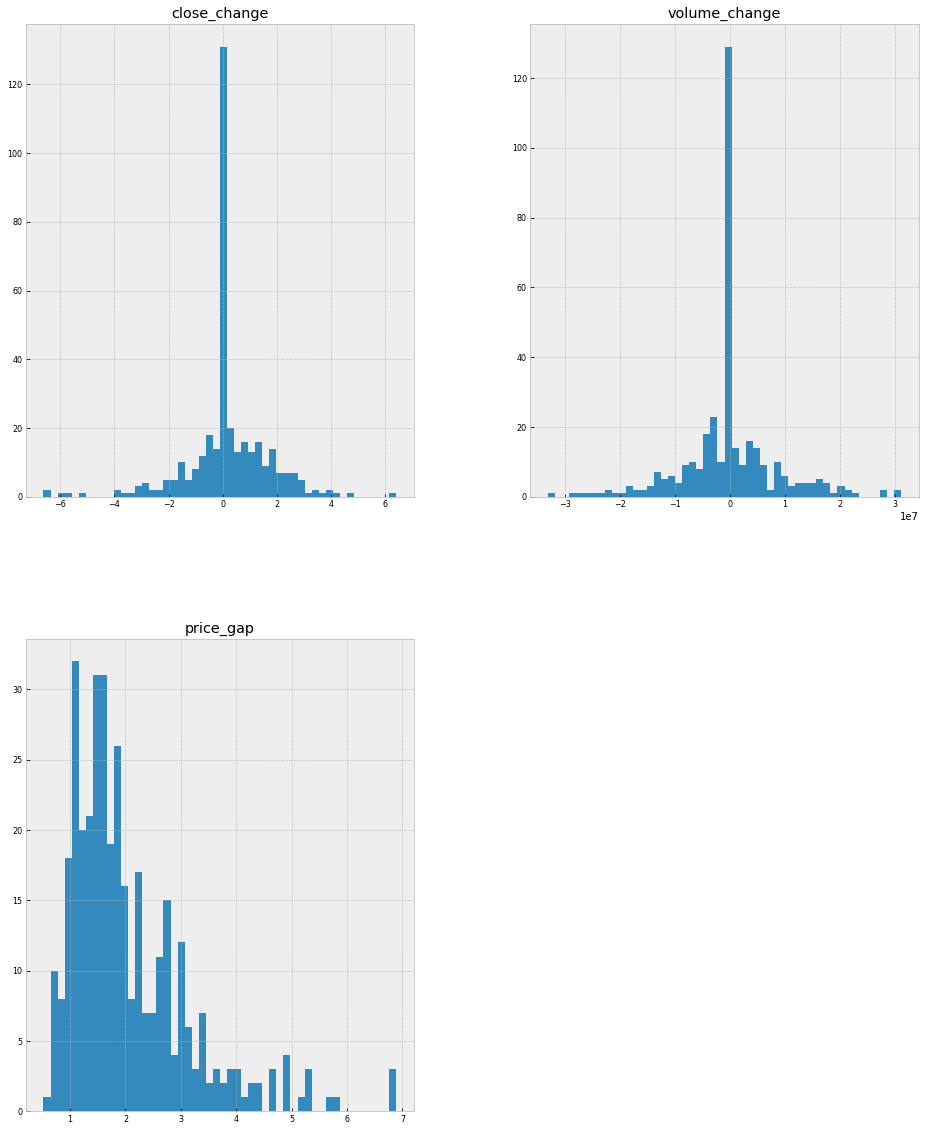

In [85]:
for year, data in gaps_QQQ_year:
    print('Analysing year: ', year)
    data.drop(columns=['year']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()

Special attention on :2012

In [86]:
gaps_QQQ_year.mean()

,close_change,volume_change,price_gap
year,,,
2010,0.023863,-31613.972603,0.732630
2011,0.003753,-45774.520548,0.898055
2012,0.025410,97572.677596,0.757978
2013,0.062548,-89461.643836,0.691534
2014,0.041890,-1433.972603,1.009534
2015,0.023589,15122.465753,1.338083
2016,0.018087,32410.382514,1.240738
2017,0.102137,-23460.273973,1.096301
2018,-0.004110,54326.849315,2.771507


In [87]:
gaps_QQQ_year.var()

,close_change,volume_change,price_gap
year,,,
2010,0.221580,6.350692e+14,0.200322
2011,0.465385,3.518963e+14,0.218418
2012,0.265498,1.605324e+14,0.097327
2013,0.223681,8.233089e+13,0.083342
2014,0.455561,1.560707e+14,0.255902
2015,0.996369,1.196487e+14,1.220526
2016,0.832807,9.825257e+13,0.465364
2017,0.591823,1.316958e+14,0.484959
2018,3.927213,2.263266e+14,2.805866


In [88]:
gaps_QQQ_year.describe()

close_change                                                         \
            count      mean       std       min       25%  50%       75%   
year                                                                       
2010        365.0  0.023863  0.470723 -1.740002 -0.070004  0.0  0.180000   
2011        365.0  0.003753  0.682191 -3.240002 -0.189999  0.0  0.290001   
2012        366.0  0.025410  0.515265 -1.650002 -0.129997  0.0  0.190002   
2013        365.0  0.062548  0.472949 -1.730003 -0.079994  0.0  0.290001   
2014        365.0  0.041890  0.674953 -2.720001 -0.089996  0.0  0.320000   
2015        365.0  0.023589  0.998183 -4.680000 -0.269997  0.0  0.400002   
2016        366.0  0.018087  0.912582 -4.479996 -0.187502  0.0  0.320000   
2017        365.0  0.102137  0.769300 -3.590012 -0.040009  0.0  0.369995   
2018        365.0 -0.004110  1.981720 -7.930008 -0.389999  0.0  0.700012   
2019        364.0  0.159203  1.529277 -6.620010 -0.182495  0.0  0.807503   

               volume_change                                           \
           max         count          mean           std          min   
year                                                                    
2010  2.360001         365.0 -31613.972603  2.520058e+07 -152158800.0   
2011  2.439999         365.0 -45774.520548  1.875890e+07  -82073200.0   
2012  1.960003         366.0  97572.677596  1.267014e+07  -57286200.0   
2013  2.070000         365.0 -89461.643836  9.073637e+06  -37719200.0   
2014  2.480003         365.0  -1433.972603  1.249283e+07  -47217400.0   
2015  4.940002         365.0  15122.465753  1.093840e+07  -75741600.0   
2016  3.290001         366.0  32410.382514  9.912244e+06  -42689000.0   
2017  4.279999         365.0 -23460.273973  1.147588e+07  -53261000.0   
2018  8.960007         365.0  54326.849315  1.504416e+07  -84966100.0   
2019  6.409988         364.0 -85713.736264  8.735693e+06  -33142800.0   

                                             price_gap                      \
            25%  50%        75%          max     count      mean       std   
year                                                                         
2010 -8556000.0  0.0  7260400.0  145796600.0     365.0  0.732630  0.447573   
2011 -4614800.0  0.0  5068400.0   81281800.0     365.0  0.898055  0.467353   
2012 -4429800.0  0.0  5020475.0   56256400.0     366.0  0.757978  0.311973   
2013 -2972000.0  0.0  2628600.0   43932300.0     365.0  0.691534  0.288690   
2014 -4052200.0  0.0  3177100.0  100894100.0     365.0  1.009534  0.505868   
2015 -3460500.0  0.0  3322800.0   53066500.0     365.0  1.338083  1.104774   
2016 -3277825.0  0.0  2988400.0   49456500.0     366.0  1.240738  0.682176   
2017 -4589800.0  0.0  3005600.0   84366300.0     365.0  1.096301  0.696390   
2018 -4992100.0  0.0  4803200.0   65373200.0     365.0  2.771507  1.675072   
2019 -3126500.0  0.0  2953750.0   31128700.0     364.0  2.045934  1.088879   

                                                         
           min       25%       50%       75%        max  
year                                                     
2010  0.169998  0.460003  0.650002  0.880001   5.680000  
2011  0.240002  0.579998  0.790001  1.099998   3.150002  
2012  0.220001  0.520004  0.700001  0.959999   1.720001  
2013  0.240005  0.490005  0.620003  0.860001   2.169998  
2014  0.309998  0.659996  0.919998  1.210007   3.270004  
2015  0.360001  0.800003  1.150002  1.589996  17.790001  
2016  0.379997  0.760002  1.090004  1.457500   4.580002  
2017  0.369995  0.680008  0.910004  1.290009   5.789993  
2018  0.709991  1.520004  2.309998  3.669998   9.770004  
2019  0.519989  1.310009  1.710007  2.559998   6.889999